# Polymer Electrolyte Data Mining Project:

## Step 2: Data visualizations for statistical learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.axes_divider import make_axes_area_auto_adjustable
import matplotlib as mpl

In [2]:
font = {'size'   : 14}

mpl.rc('font', **font)

In [3]:
%matplotlib notebook

### Import data for visualizations

Import dataset saved from data cleaning notebook

In [24]:
# Import data from master excel file
file_name = 'Cleaned_Final_Data_6_2_2020.csv'
file_path = r'C:\Users\nicol\Box Sync\Personal\Research\DataMining_PolymerElectrolyte_Review\DataSpreadsheets\_' 
file = file_path + file_name
data = pd.read_csv(file)
data.head()

Polymer system Notes    Polymer family                 Polymer  \
0                  NaN  carbonate, ether  polyethylene carbonate   
1                  NaN  carbonate, ether  polyethylene carbonate   
2                  NaN  carbonate, ether  polyethylene carbonate   
3                  NaN  carbonate, ether  polyethylene carbonate   
4                  NaN  carbonate, ether  polyethylene carbonate   

  SMILES descriptor 1 SMILES descriptor 2  Comonomer percentage  \
0           COC(=O)OC                 COC                  95.2   
1           COC(=O)OC                 COC                  95.2   
2           COC(=O)OC                 COC                  95.2   
3           COC(=O)OC                 COC                  95.2   
4           COC(=O)OC                 COC                  95.2   

   Average functional group per monomer        Anion  Li:monomer  \
0                                   NaN         TFSI    0.074817   
1                                   NaN         TFSI    0.199513   
2                                   NaN         TFSI    0.448905   
3                                   NaN         TFSI    1.197079   
4                                   NaN  N(SO2C2F5)2    0.055470   

   Li:functional group  ...  anion AETA_dBeta  anion ETA_psi_1  \
0             0.074817  ...         -0.233333         0.288604   
1             0.199513  ...         -0.233333         0.288604   
2             0.448905  ...         -0.233333         0.288604   
3             1.197079  ...         -0.233333         0.288604   
4             0.055470  ...         -0.357143         0.276687   

   anion ETA_dPsi_A anion ETA_dPsi_B  anion Kier1  anion Kier2  solvent BP  \
0          0.425396              0.0           15       3.7856        82.0   
1          0.425396              0.0           15       3.7856        82.0   
2          0.425396              0.0           15       3.7856        82.0   
3          0.425396              0.0           15       3.7856        82.0   
4          0.437313              0.0           21  5.273922571        82.0   

  approxTg  approxMW(kDa)  Index  
0     -3.0           37.0      0  
1    -20.0           37.0      1  
2    -33.0           37.0      2  
3    -62.0           37.0      3  
4    -14.0           37.0      4  

[5 rows x 305 columns]

Recording number of papers, number of polymers, number of entries and number of conductivity data points

In [25]:
print('Number of papers:',len(pd.unique(data['DOI'])))
print('Number of polymers:',len(pd.unique(data['Polymer'])))
print('Number of polymer, anion, concentration entries:',len(data))

Number of papers: 65
Number of polymers: 78
Number of polymer, anion, concentration entries: 655


In [26]:
entry_counter = 0
for column in data.columns[18:40]:
    entry_counter += len(data[pd.notna(data[column])])
print('Number of total conductivity points:',entry_counter)

Number of total conductivity points: 5225


### Simple data visualizations

Most of the data visualizations will be done in the website. Here, we'll mostly just focus on looking at correlations.

Make relevant conductivities into log format

In [27]:
data['logCond60'] = np.log10(data['Conductivity at 60C'])
data['logCond30'] = np.log10(data['Conductivity at 30C'])
data['logCond90'] = np.log10(data['Conductivity at 90C'])
data['log Li:functional group'] = np.log10(data['Li:functional group'])

Create pairplots for some of the variables of interest. Choose those in the `cols` variable

If you only want to plot the off-diagonals:

g1 = sns.PairGrid(data_Mordred_anion,vars=cols)

g1 = g1.map_offdiag(plt.scatter,edgecolor='w')

<IPython.core.display.Javascript object>


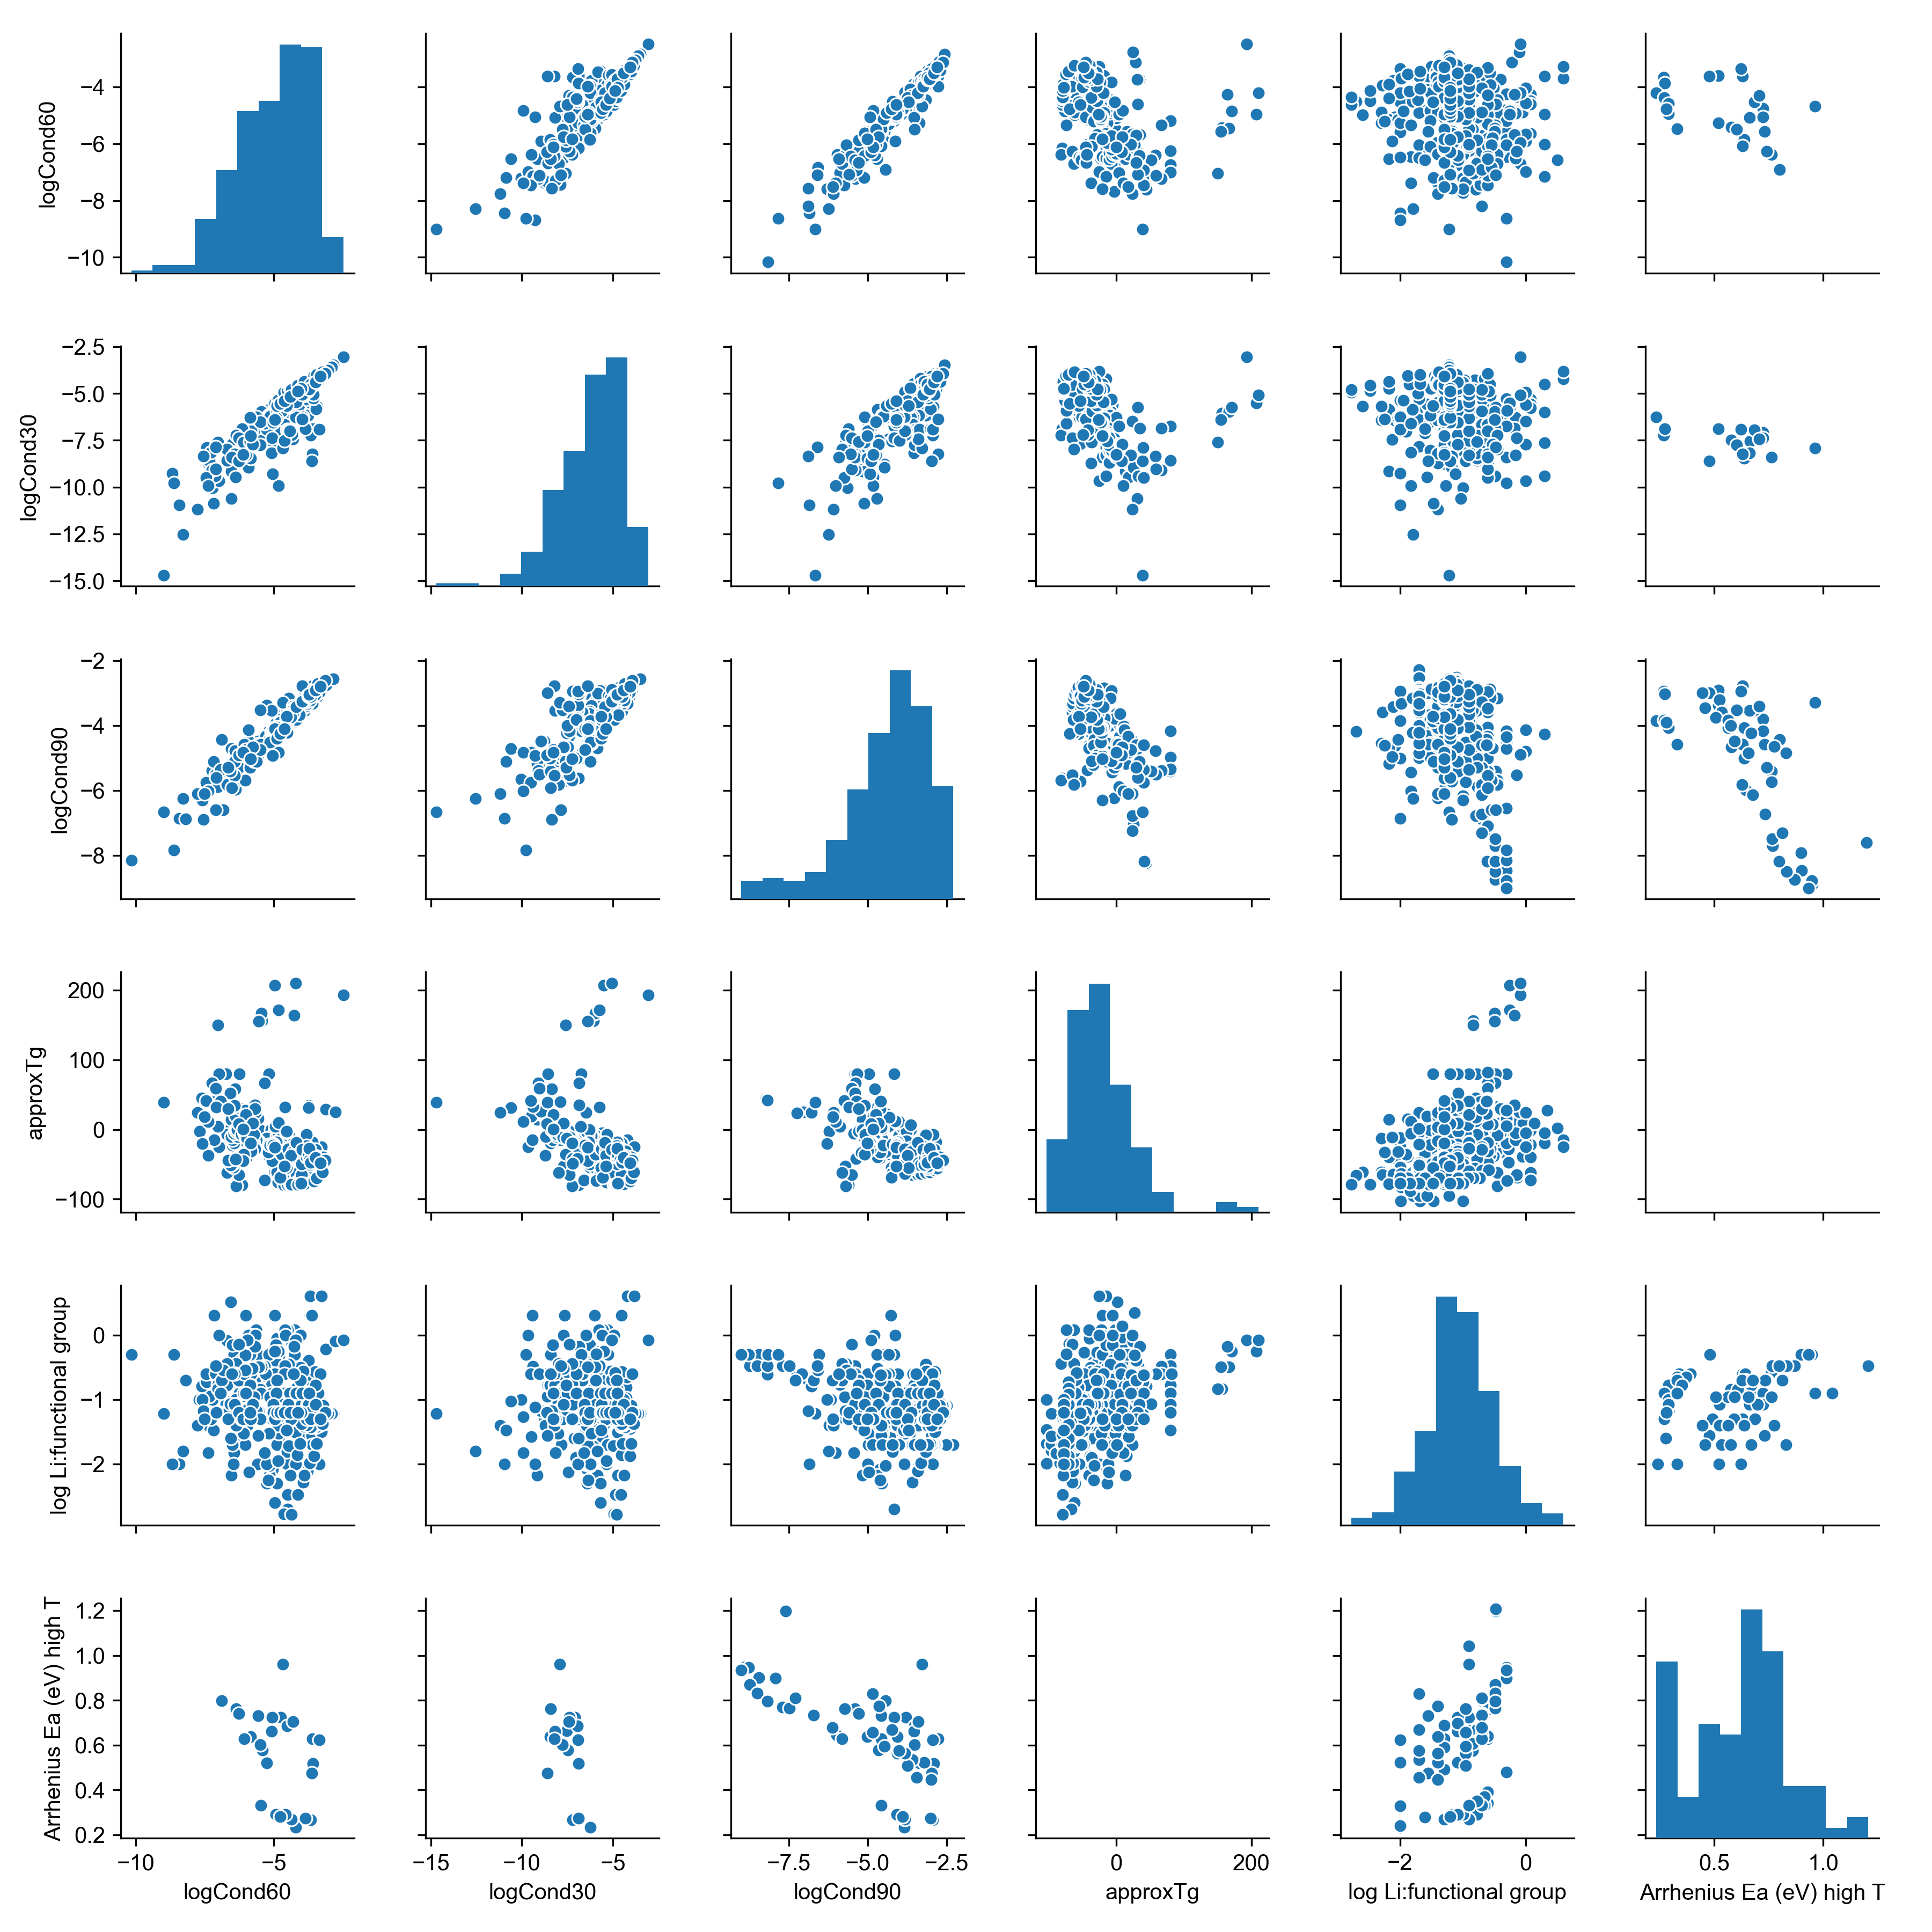

In [28]:
cols = ['logCond60','logCond30','logCond90','approxTg','log Li:functional group','Arrhenius Ea (eV) high T']

sns.pairplot(data,vars=cols, height=2.0)

### Plotting prevalence of polymer functional groups and anions

In [29]:
polymer_families_vis = data['Polymer family'].value_counts()
print('Unique polymer families:')
print(polymer_families_vis)

Unique polymer families:
ether                       316
carbonate, ether             64
carbonate                    44
ester                        38
amine                        29
ester, ether                 24
nitrile                      22
amide, imidazole             21
alcohol, acrylate            17
amide, ether                 15
ether, phosphazene           14
ester, carbonate             10
ether, acrylate              10
phenyl                        8
ether, sulfonyl               5
ether, amide, imidazole       5
carbonyl                      4
imidazole                     2
acrylate                      2
phenyl, amide, ester          1
ether, acrylate, phenyl       1
ether, benzyl                 1
acrylonitrile, acrylate       1
carbonate, ether, phenyl      1
Name: Polymer family, dtype: int64


In [30]:
# set colors
from matplotlib import cm
colors = [cm.Set3(i) for i in range(12)]

Plot bar chart for all functional groups

<IPython.core.display.Javascript object>


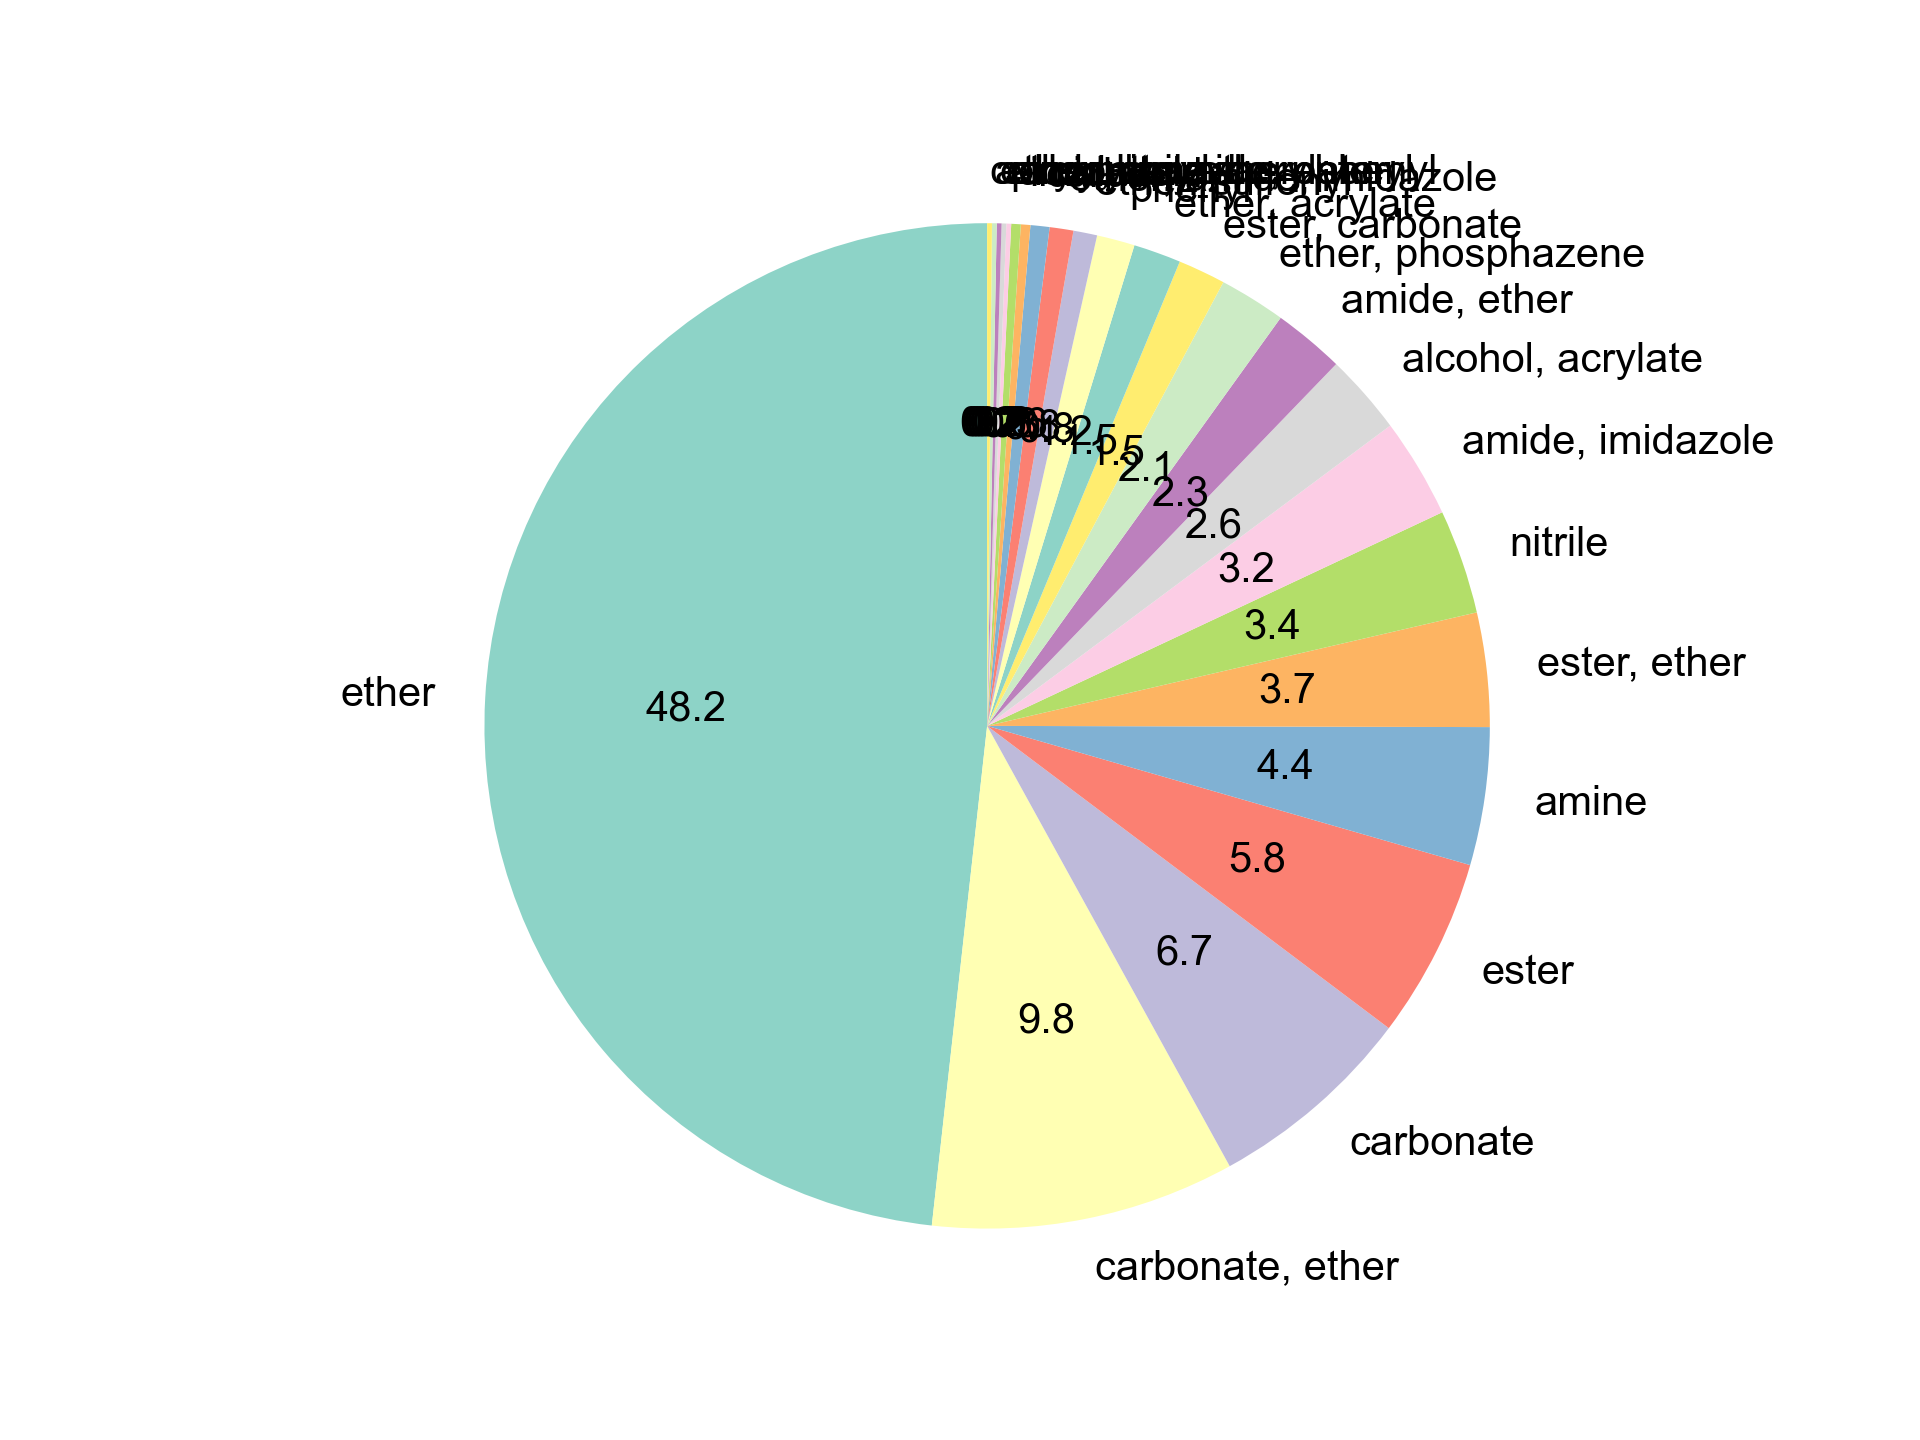

In [31]:
fig1, ax1 = plt.subplots()
ax1.pie(polymer_families_vis.values, labels=polymer_families_vis.keys(), autopct='%.1f', startangle=90, colors = colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Note that functional groups are 'unique' when they have two separated by a comma (copolymers). For the following visualization, split those into individual functional groups

In [32]:
# split functional groups
family = []
family_counts = []
for fam,counts in polymer_families_vis.items():
    fam = fam.replace(",","")
    family+=fam.split(" ")
    for i in range(len(fam.split(" "))):
        family_counts.append(counts)
        
polym_fam_vis = pd.DataFrame({'Polymer_fams':family,'Entries':family_counts})


In [33]:
# visualize the number of functional groups
polym_condensed_vis = polym_fam_vis.groupby(by='Polymer_fams',axis=0,as_index=False).sum()
polym_condensed_vis=polym_condensed_vis.sort_values(by = ['Entries'],ascending=False)
polym_condensed_vis

Polymer_fams  Entries
9           ether      456
6       carbonate      119
8           ester       73
3           amide       42
0        acrylate       31
4           amine       29
10      imidazole       28
11        nitrile       22
2         alcohol       17
13    phosphazene       14
12         phenyl       11
14       sulfonyl        5
7        carbonyl        4
1   acrylonitrile        1
5          benzyl        1

In [34]:
# condense same functional groups that happened to have different naming
polym_nitrile = pd.DataFrame({'Polymer_fams':['nitrile'],'Entries':[sum([polym_condensed_vis['Entries'][11],polym_condensed_vis['Entries'][1]])]})
polym_condensed_vis_2 = polym_condensed_vis.append(polym_nitrile, ignore_index=True)
polym_condensed_vis_2

Polymer_fams  Entries
0           ether      456
1       carbonate      119
2           ester       73
3           amide       42
4        acrylate       31
5           amine       29
6       imidazole       28
7         nitrile       22
8         alcohol       17
9     phosphazene       14
10         phenyl       11
11       sulfonyl        5
12       carbonyl        4
13  acrylonitrile        1
14         benzyl        1
15        nitrile       23

In [35]:
# remove redundant functional groups
polym_condensed_vis_2.drop([7,13],axis=0,inplace=True)
polym_condensed_vis_2

Polymer_fams  Entries
0         ether      456
1     carbonate      119
2         ester       73
3         amide       42
4      acrylate       31
5         amine       29
6     imidazole       28
8       alcohol       17
9   phosphazene       14
10       phenyl       11
11     sulfonyl        5
12     carbonyl        4
14       benzyl        1
15      nitrile       23

In [38]:
# condense same functional groups that happened to have different naming
polym_phenyl = pd.DataFrame({'Polymer_fams':['phenyl'],'Entries':[sum([polym_condensed_vis_2['Entries'][10],polym_condensed_vis_2['Entries'][14]])]})
polym_condensed_vis_3 = polym_condensed_vis_2.append(polym_phenyl, ignore_index=True)
polym_condensed_vis_3

Polymer_fams  Entries
0         ether      456
1     carbonate      119
2         ester       73
3         amide       42
4      acrylate       31
5         amine       29
6     imidazole       28
7       alcohol       17
8   phosphazene       14
9        phenyl       11
10     sulfonyl        5
11     carbonyl        4
12       benzyl        1
13      nitrile       23
14       phenyl       12

In [39]:
# remove redundant functional groups
polym_condensed_vis_3.drop([9,12],axis=0,inplace=True)
polym_condensed_vis_3

Polymer_fams  Entries
0         ether      456
1     carbonate      119
2         ester       73
3         amide       42
4      acrylate       31
5         amine       29
6     imidazole       28
7       alcohol       17
8   phosphazene       14
10     sulfonyl        5
11     carbonyl        4
13      nitrile       23
14       phenyl       12

In [40]:
# sort functional groups by number of entries
polym_condensed_vis_3=polym_condensed_vis_3.sort_values(by = ['Entries'],ascending=False)
polym_condensed_vis_3

Polymer_fams  Entries
0         ether      456
1     carbonate      119
2         ester       73
3         amide       42
4      acrylate       31
5         amine       29
6     imidazole       28
13      nitrile       23
7       alcohol       17
8   phosphazene       14
14       phenyl       12
10     sulfonyl        5
11     carbonyl        4

Visualize split and sorted functional group listings

<IPython.core.display.Javascript object>


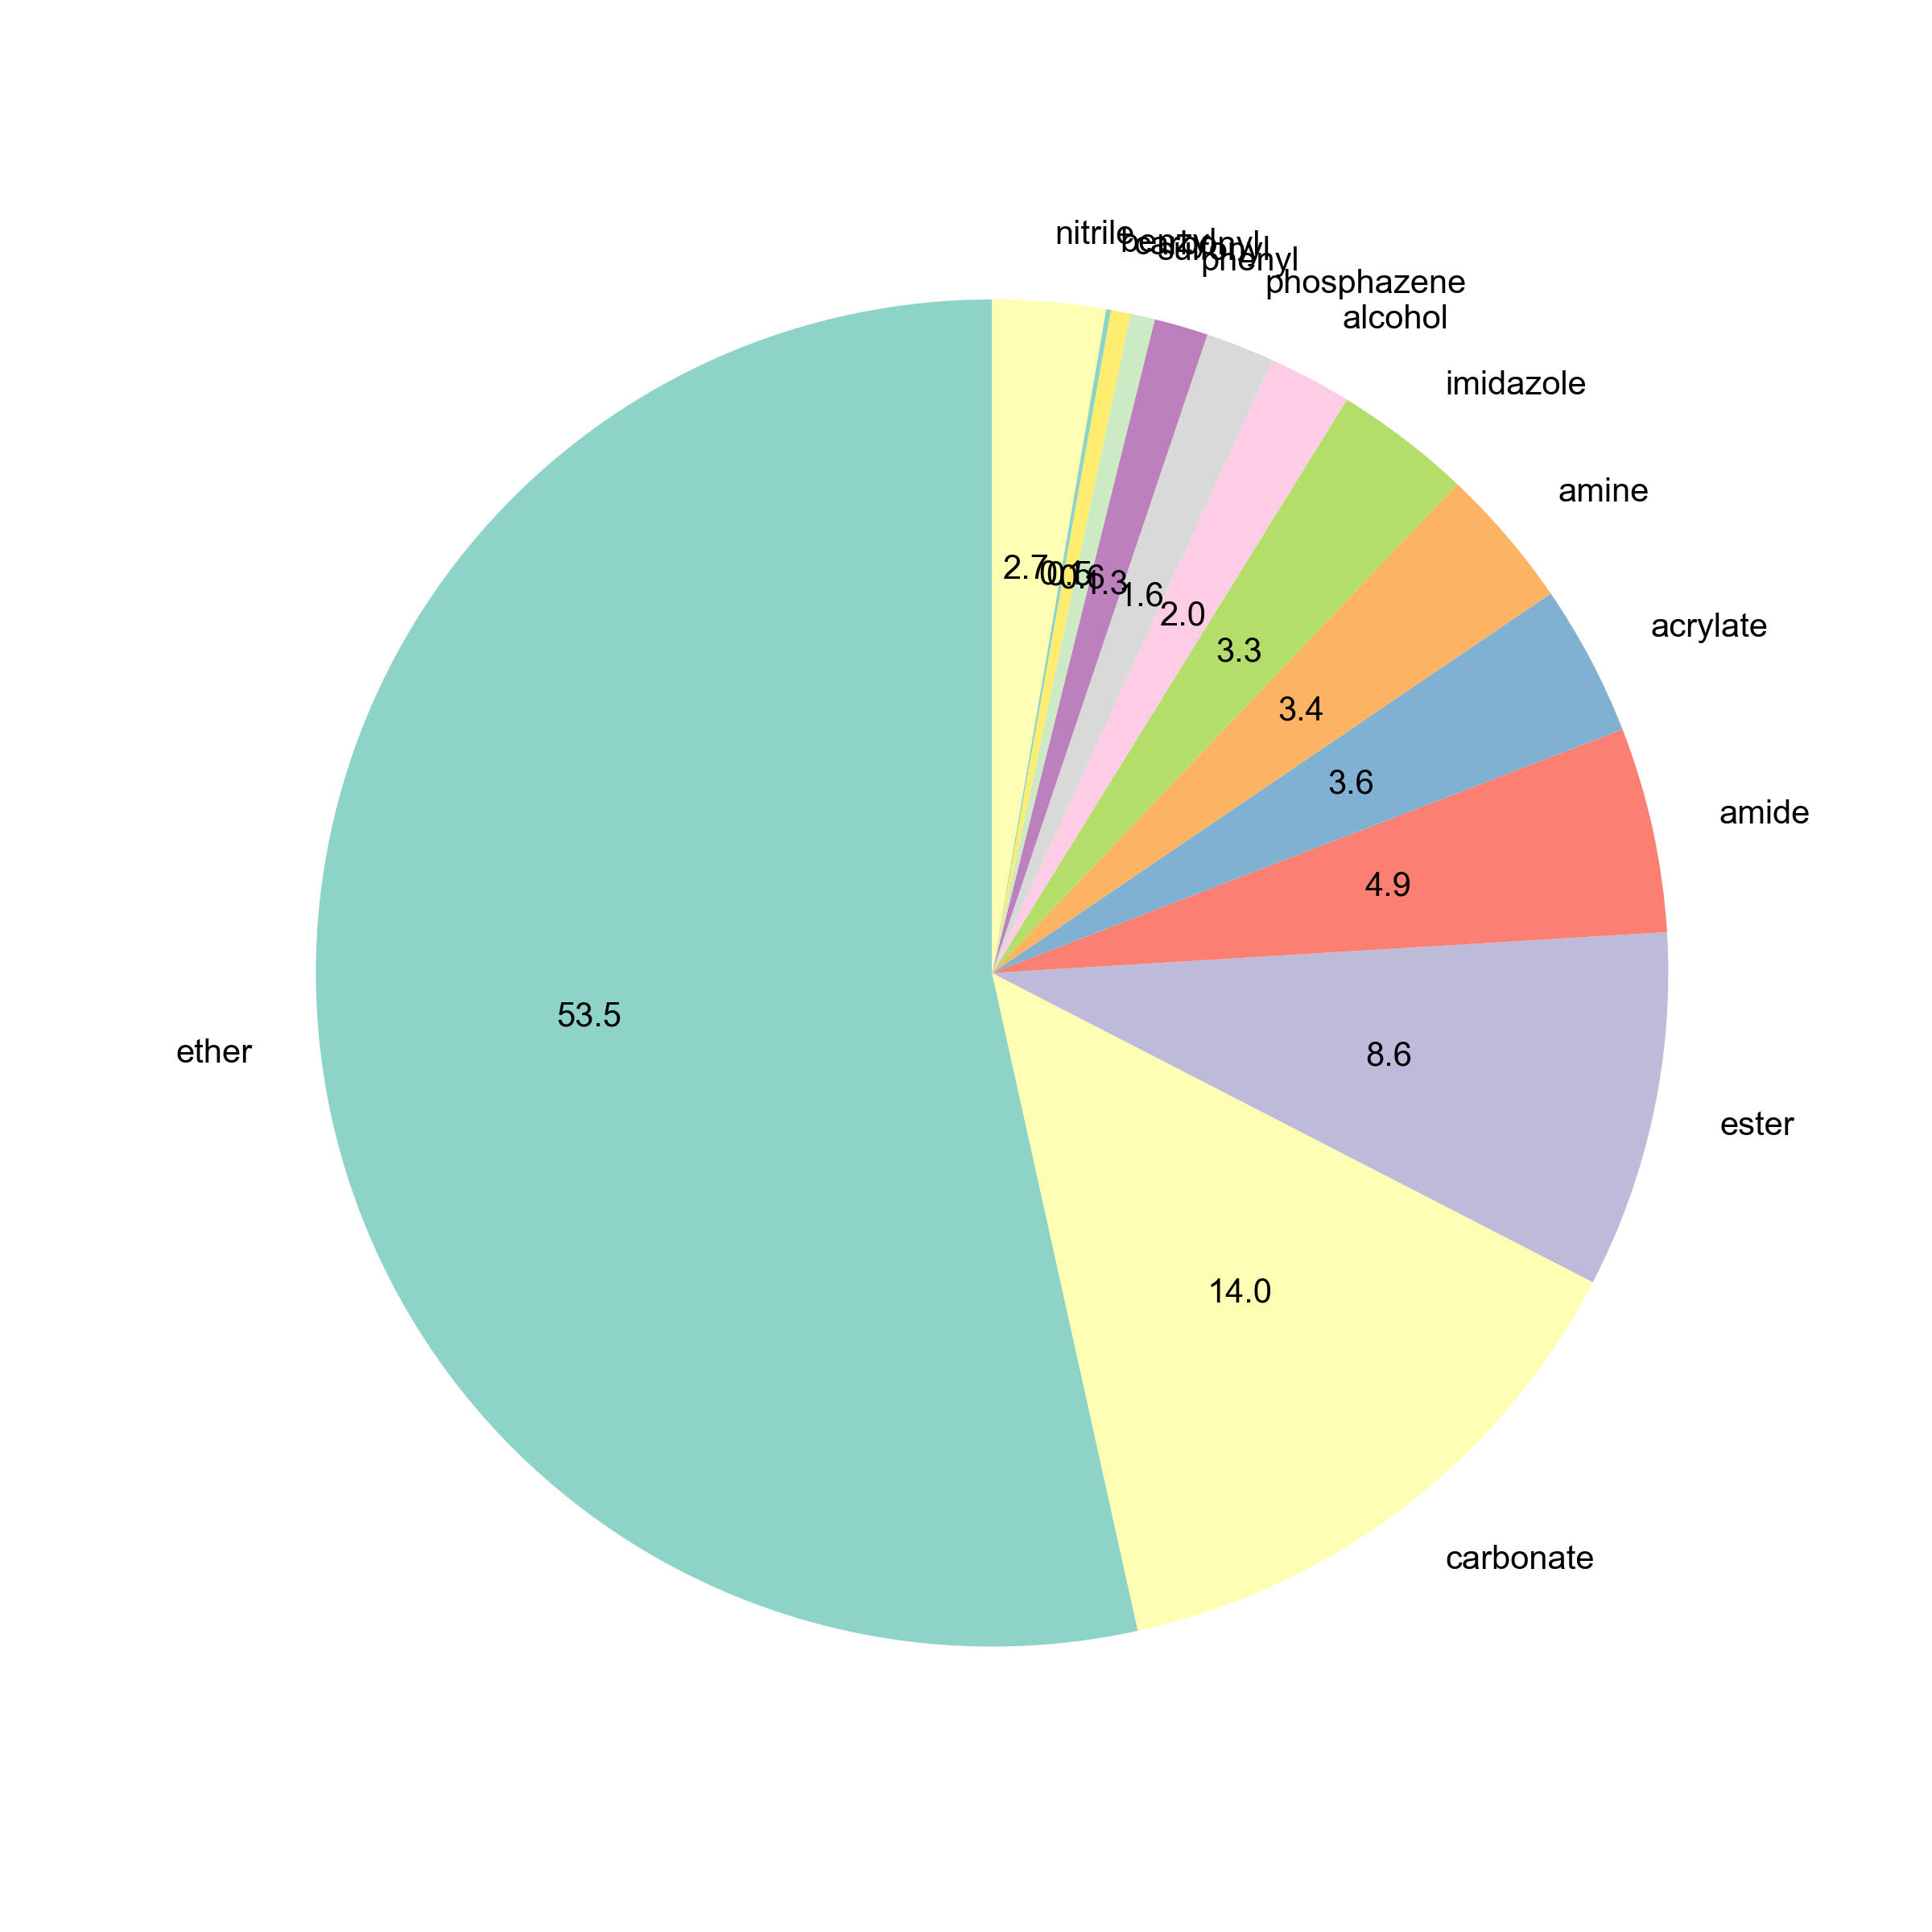

In [41]:
fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(polym_condensed_vis_2['Entries'], labels=polym_condensed_vis_2['Polymer_fams'], autopct='%.1f', startangle=90, colors = colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### Group smallest functional groups, analyze percentages and create new visualization

In [42]:
polym_condensed_vis_3['Polymer_fams'][-4:]

8     phosphazene
14         phenyl
10       sulfonyl
11       carbonyl
Name: Polymer_fams, dtype: object

In [44]:
print('Percentage of phosphazene: ',(polym_condensed_vis_3['Entries'][8]/sum(polym_condensed_vis_3['Entries'])*100))
print('Percentage of phenyl: ',(polym_condensed_vis_3['Entries'][14]/sum(polym_condensed_vis_2['Entries'])*100))
print('Percentage of sulfonyl: ',(polym_condensed_vis_3['Entries'][10]/sum(polym_condensed_vis_3['Entries'])*100))
print('Percentage of carbonyl: ',(polym_condensed_vis_3['Entries'][11]/sum(polym_condensed_vis_3['Entries'])*100))

Percentage of phosphazene:  1.6412661195779603
Percentage of phenyl:  1.406799531066823
Percentage of sulfonyl:  0.5861664712778429
Percentage of carbonyl:  0.4689331770222743


In [45]:
# Add 'Other' grouping and add to dataframe
polym_other_vis = pd.DataFrame({'Polymer_fams':['Other'],'Entries':[sum(polym_condensed_vis_3['Entries'][-4:])]})
polym_other_vis = polym_condensed_vis_3.append(polym_other_vis, ignore_index=True)
polym_other_vis

Polymer_fams  Entries
0         ether      456
1     carbonate      119
2         ester       73
3         amide       42
4      acrylate       31
5         amine       29
6     imidazole       28
7       nitrile       23
8       alcohol       17
9   phosphazene       14
10       phenyl       12
11     sulfonyl        5
12     carbonyl        4
13        Other       35

In [46]:
# drop those functional groups that were added into Other
polym_other_vis.drop([9,10,11,12],axis=0,inplace=True)

<IPython.core.display.Javascript object>


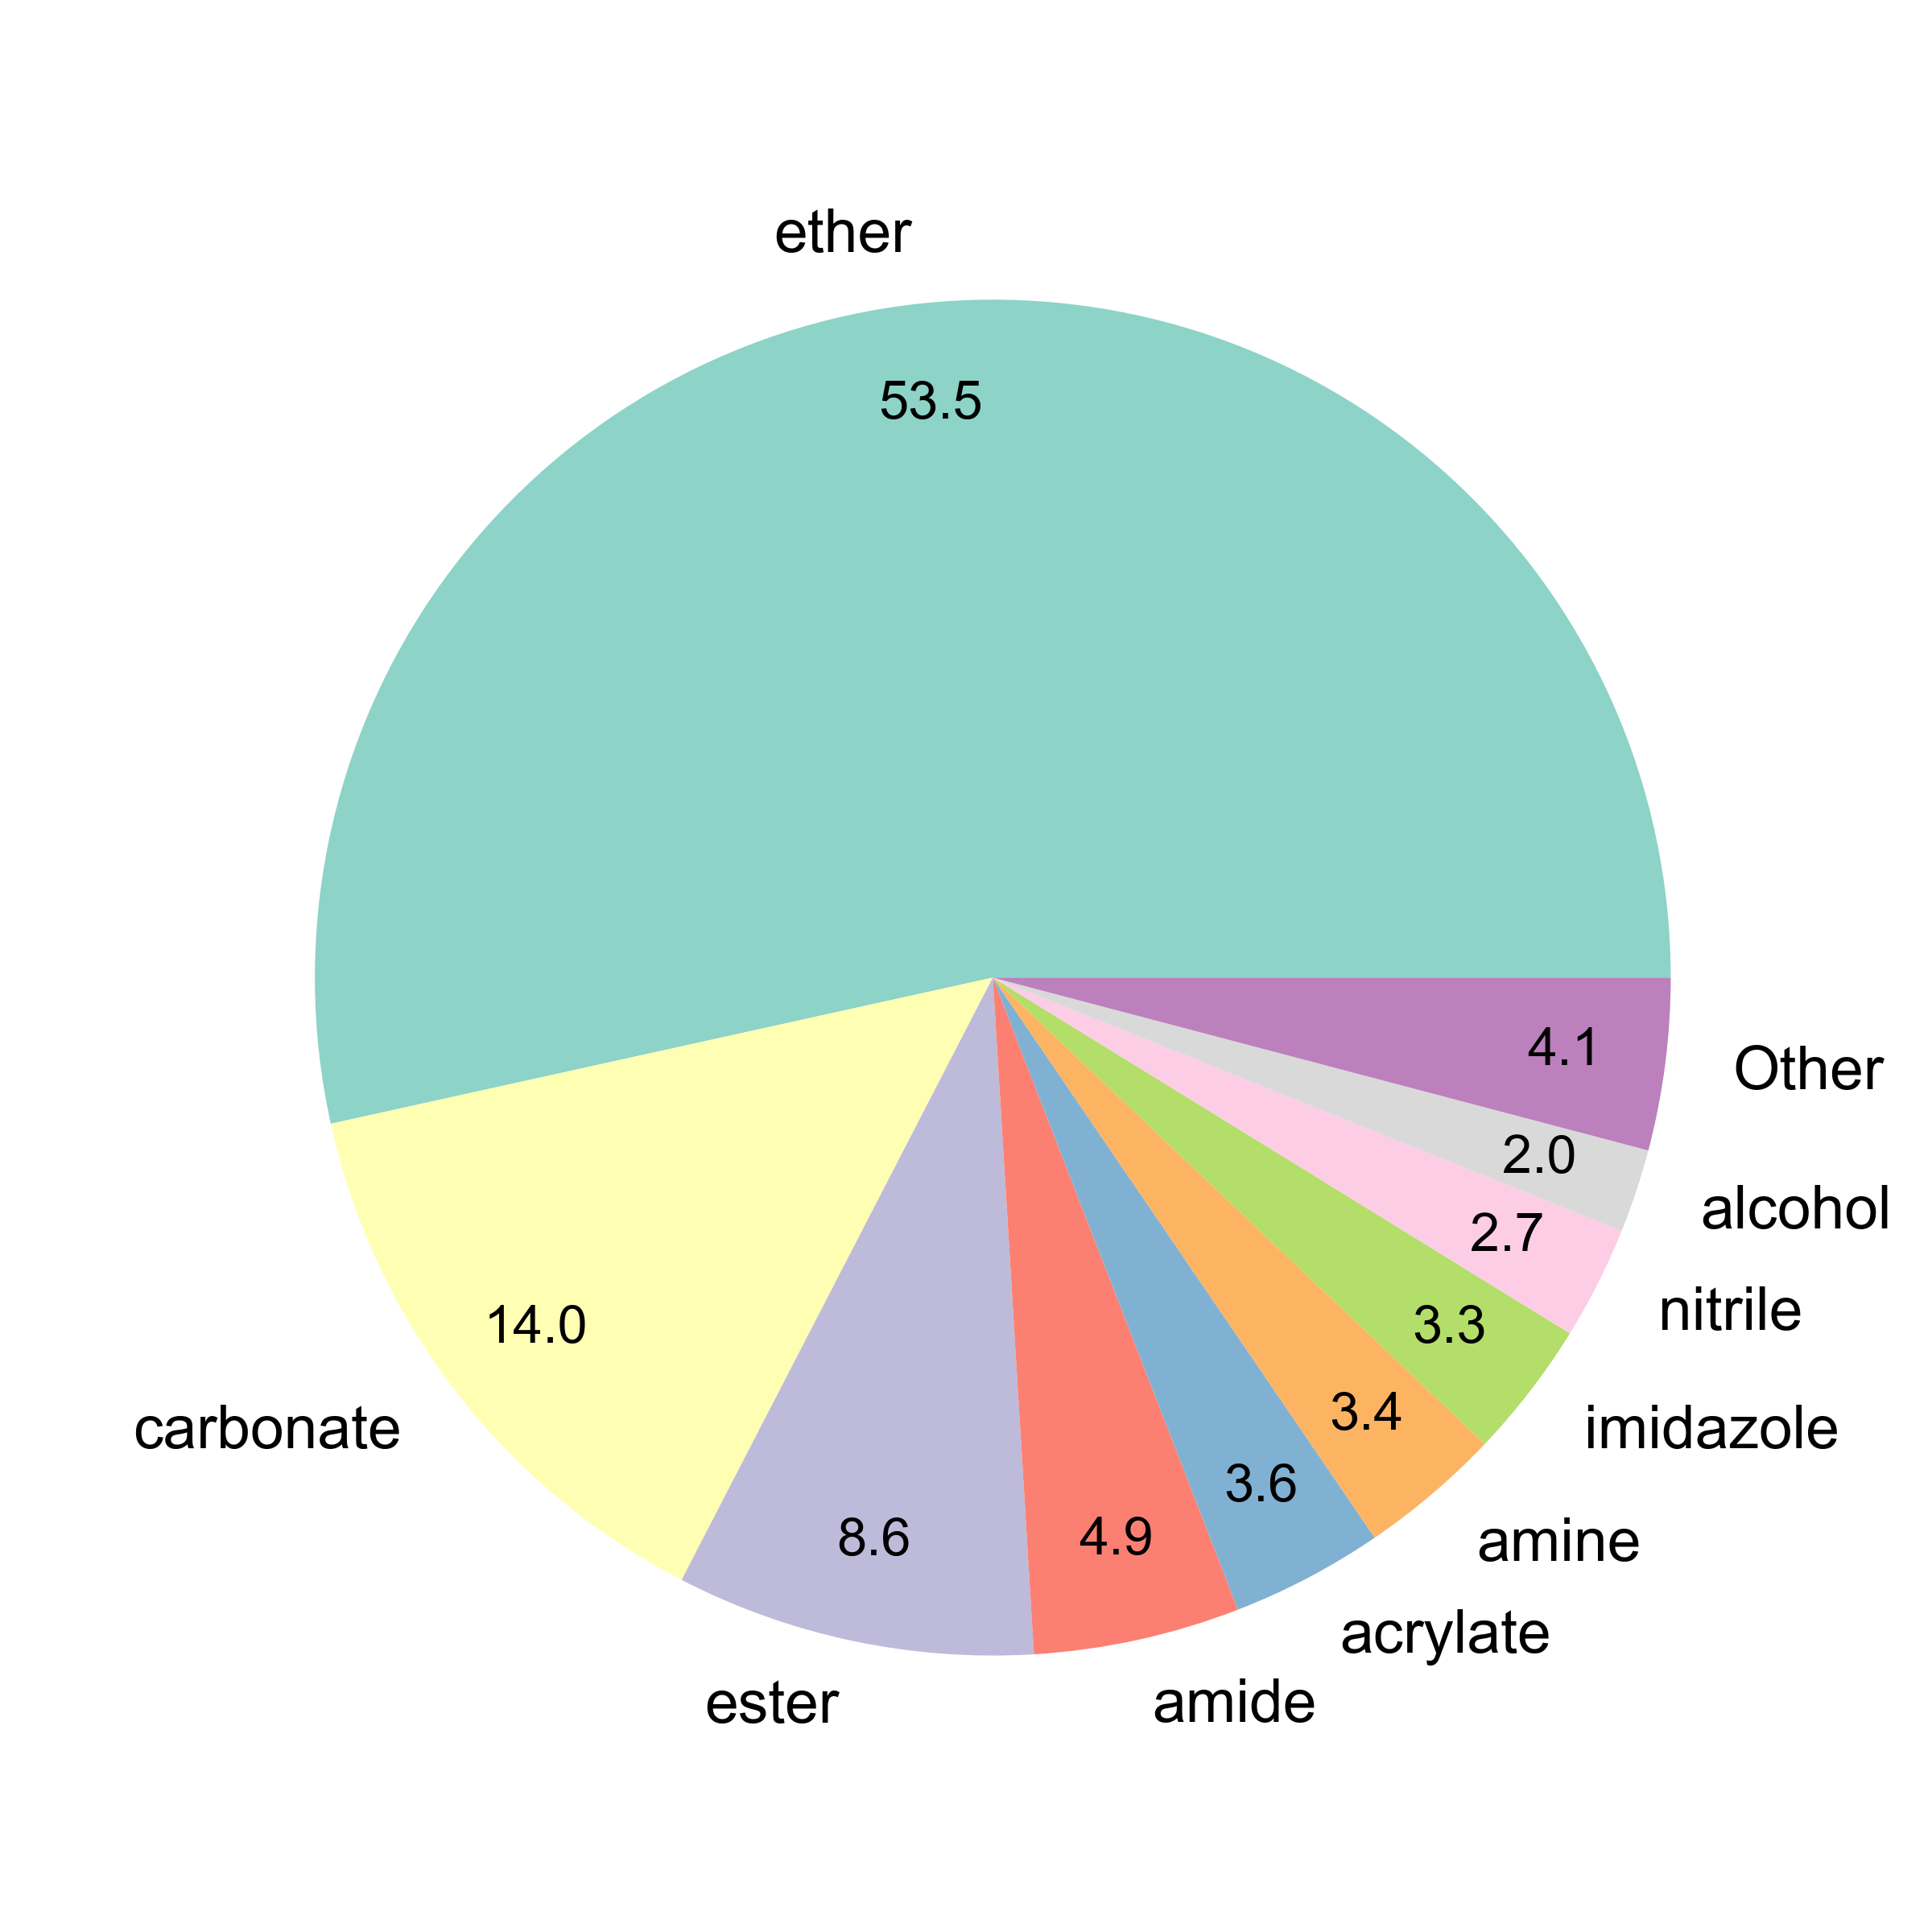

In [47]:
# plot functional groups figure
fig1, ax1 = plt.subplots(figsize=(8,8))
wedges, texts, autotexts = ax1.pie(polym_other_vis['Entries'], labels=polym_other_vis['Polymer_fams'], counterclock=True,autopct='%.1f',pctdistance = 0.85, startangle=0, colors = colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.setp(autotexts,size=16)
plt.setp(texts,size=18)
plt.show()

#### Visualize for anions as well

In [48]:
anions_vis = data['Anion'].value_counts()
anions_vis

TFSI           282
CF3SO3         164
ClO4           120
BF4             33
PF6             21
AsF6            12
AlCl4            6
MPSA             6
N(SO2C2F5)2      4
I                4
SCN              2
FSI              1
Name: Anion, dtype: int64

In [49]:
print('Percentage of N(SO2C2F5)2: ',(anions_vis['N(SO2C2F5)2']/sum(anions_vis)*100))
print('Percentage of AlCl4: ',(anions_vis['AlCl4']/sum(anions_vis)*100))
print('Percentage of MPSA: ',(anions_vis['MPSA']/sum(anions_vis)*100))
print('Percentage of I: ',(anions_vis['I']/sum(anions_vis)*100))
print('Percentage of SCN: ',(anions_vis['SCN']/sum(anions_vis)*100))
print('Percentage of FSI: ',(anions_vis['FSI']/sum(anions_vis)*100))

Percentage of N(SO2C2F5)2:  0.6106870229007634
Percentage of AlCl4:  0.9160305343511451
Percentage of MPSA:  0.9160305343511451
Percentage of I:  0.6106870229007634
Percentage of SCN:  0.3053435114503817
Percentage of FSI:  0.15267175572519084


In [50]:
anions_other_counts_vis = anions_vis['N(SO2C2F5)2'] + anions_vis['AlCl4'] + anions_vis['MPSA'] + anions_vis['SCN'] + anions_vis['FSI'] + anions_vis['I']
anions_other_counts_vis

23

In [51]:
anions_vis.keys()

Index(['TFSI', 'CF3SO3', 'ClO4', 'BF4', 'PF6', 'AsF6', 'AlCl4', 'MPSA',
       'N(SO2C2F5)2', 'I', 'SCN', 'FSI'],
      dtype='object')

In [52]:
anions_other_vis = pd.Series(data=[anions_vis['TFSI'],anions_vis['CF3SO3'], anions_vis['ClO4'], anions_vis['BF4'], 
                                   anions_vis['PF6'], anions_vis['AsF6'],anions_other_counts_vis], 
                             index = ['TFSI$^-$','CF$_3$SO$_3$$^-$','ClO$_4$$^-$','BF$_4$$^-$','PF$_6$$^-$',
                                      'AsF$_6$$^-$','Other'])


<IPython.core.display.Javascript object>


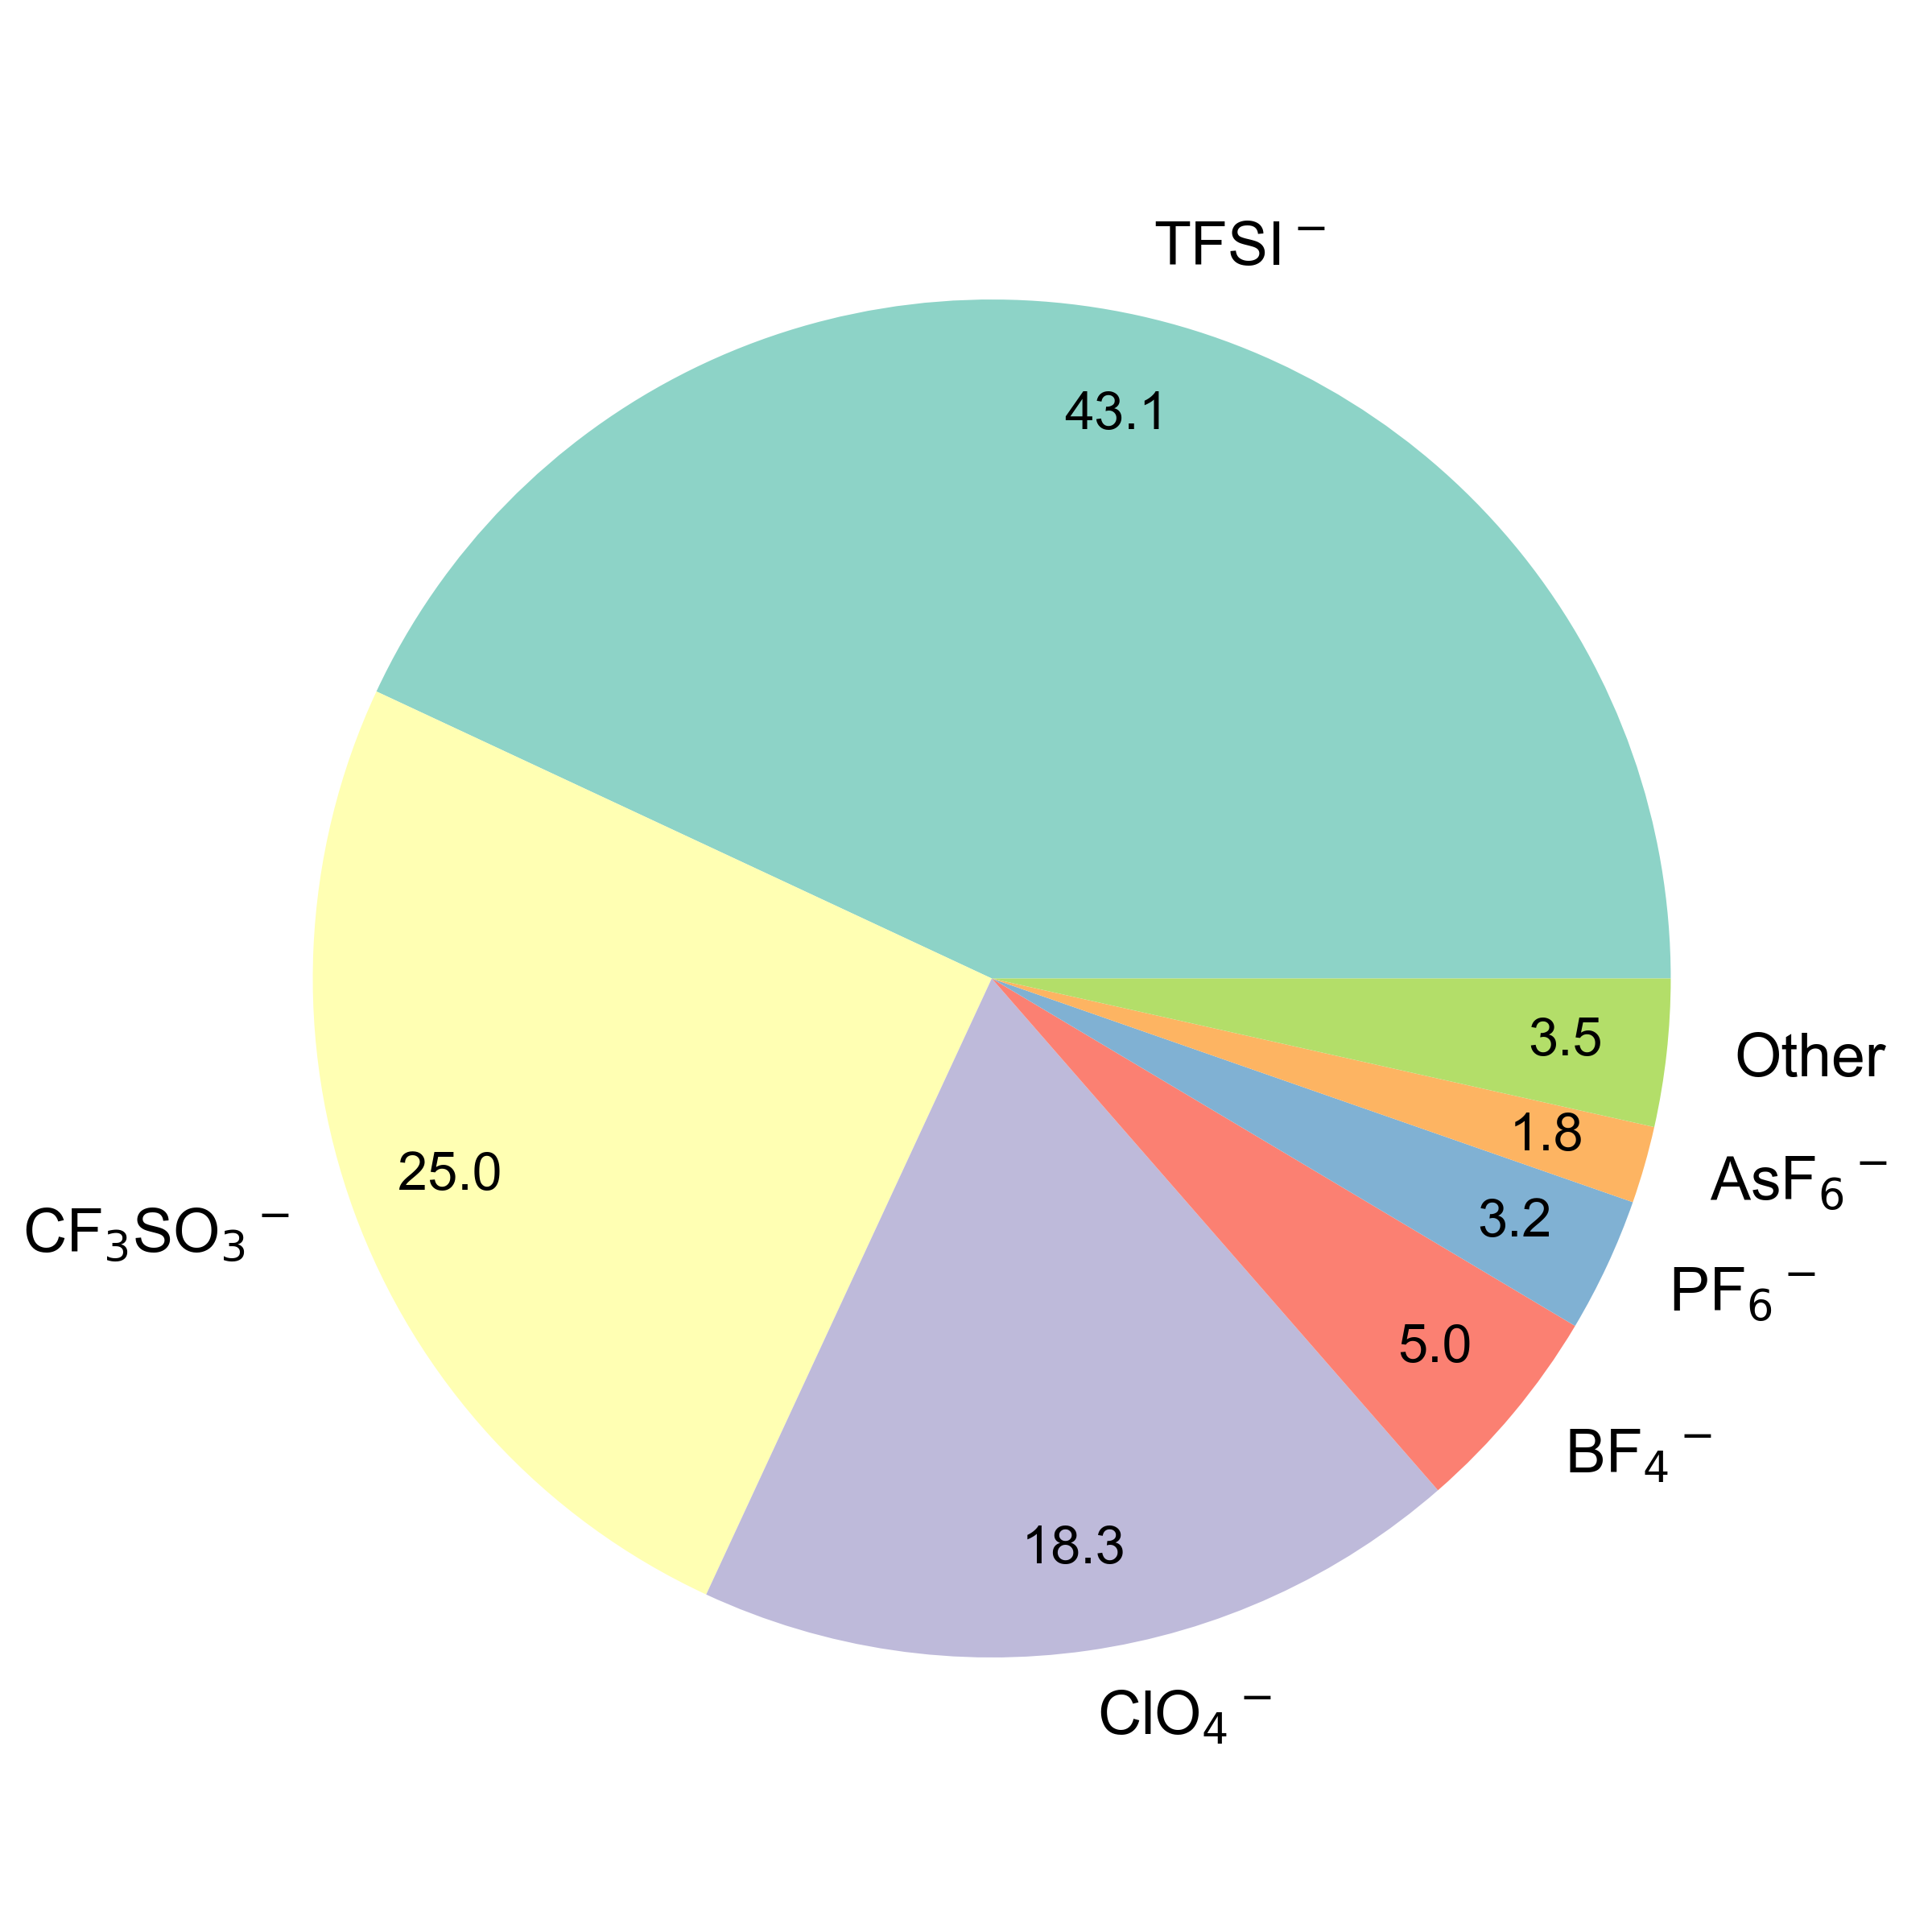

In [53]:
fig3, ax3 = plt.subplots(figsize=(8,8))
wedges, texts, autotexts = ax3.pie(anions_other_vis.values, labels=anions_other_vis.keys(), autopct='%.1f',counterclock=True, pctdistance = 0.85,startangle=0, colors = colors)
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.setp(autotexts,size=16)
plt.setp(texts,size=18)
plt.show()

### Visualization figures for publication

In [55]:
# set up colors for plots
from matplotlib import cm
import plotly.express as px
plot_colors = px.colors.qualitative.Prism +px.colors.qualitative.Pastel +px.colors.qualitative.Safe
plot_colors
colors = [cm.Set3(i) for i in range(12)]
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=colors) 
mpl.rcParams['font.size'] = 11

<IPython.core.display.Javascript object>


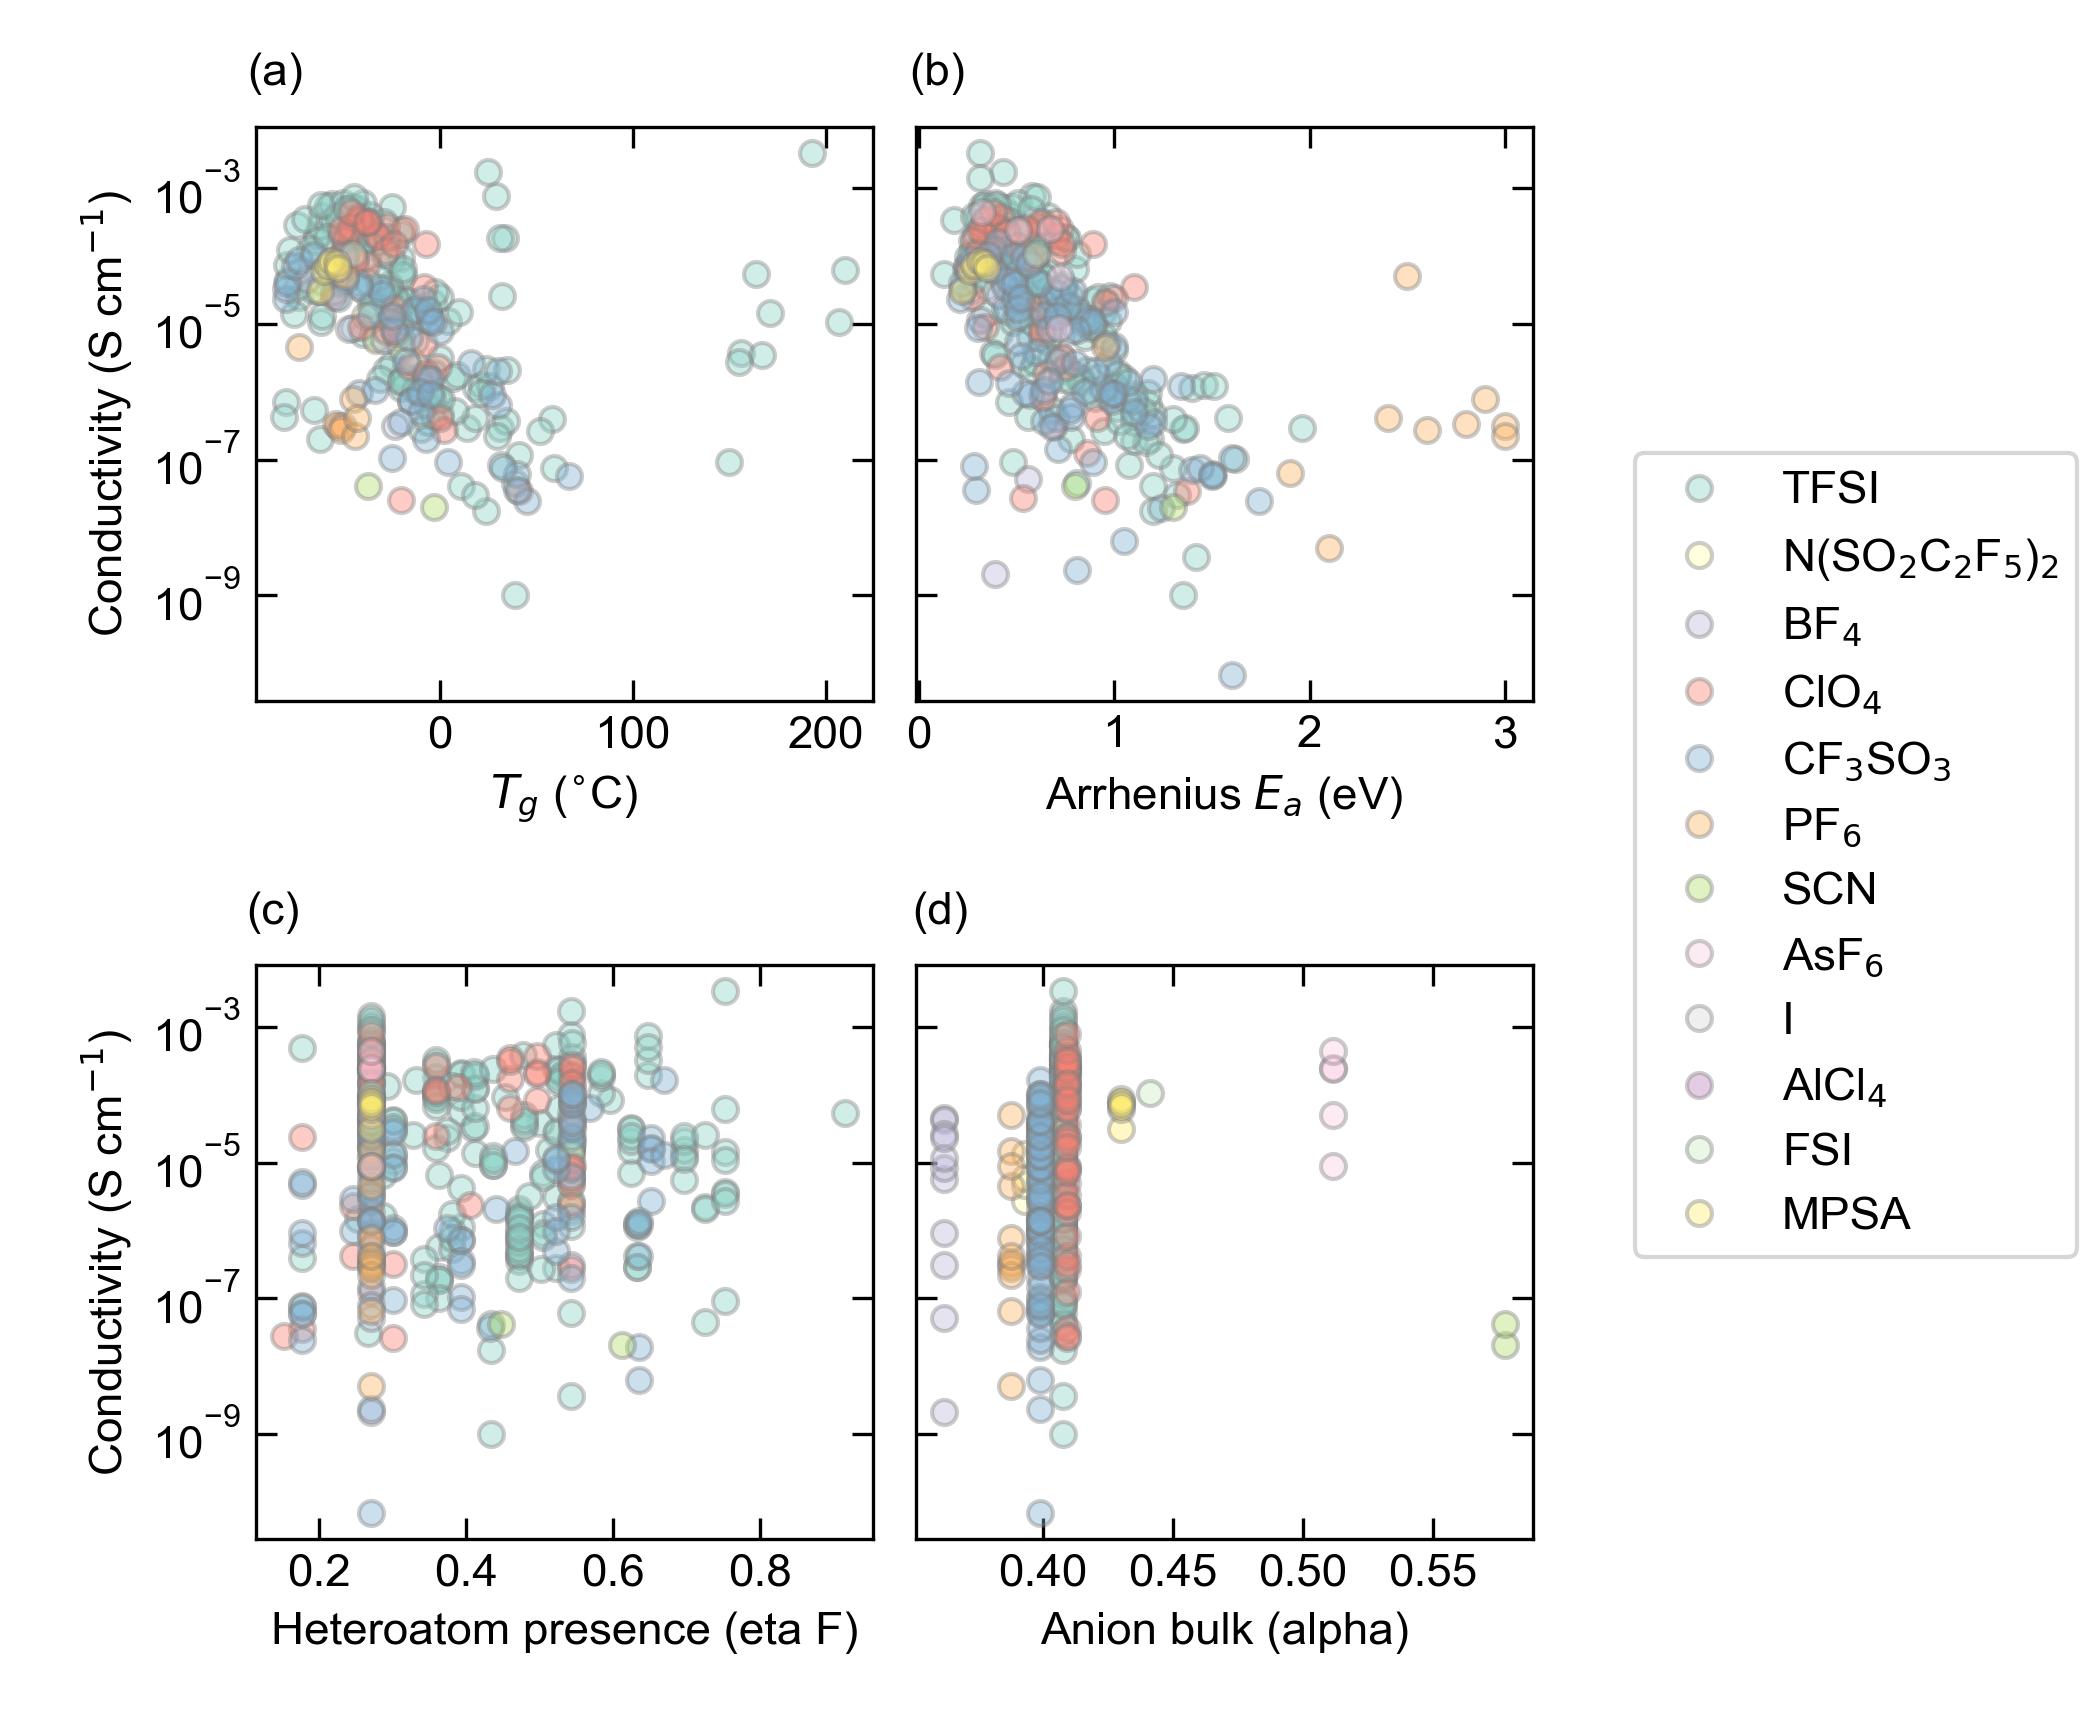

In [56]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, sharey = 'row', figsize=(7,5.7))
anion_type = pd.unique(data['Anion'])

for anion in anion_type:
    data1 = data[data['Anion']== anion]
    ax[0,0].plot(data1['Tg'],data1['Conductivity at 60C'],'o', ms=6, label=anion, alpha = 0.4,mec='grey',)
    ax[0,1].plot(data1['Arrhenius Ea (eV)'],data1['Conductivity at 60C'],'o', ms=6, label=anion, alpha = 0.4,mec='grey',)
    ax[1,0].plot(data1['Comonomer1 AETA_eta_F'],data1['Conductivity at 60C'],'o', ms=6, label=anion, alpha = 0.4,mec='grey',)
    ax[1,1].plot(data1['anion AETA_alpha'],data1['Conductivity at 60C'],'o', ms=6, label=anion, alpha = 0.4,mec='grey',)
ax[0,0].set_xlabel('$T_g$ ($^{\circ}$C)',fontsize=11)
ax[0,0].set_ylabel('Conductivity (S cm$^{-1}$)',fontsize=11)
ax[0,0].set_yscale('log')
ax[0,0].tick_params(which = 'major',direction='in', length=5, bottom=True, top=True, left=True, right=True)
ax[0,0].tick_params(axis = 'y',which = 'minor',direction='in', length=4,left=True, right=True)
ax[0,0].set(adjustable='box')
ax[0,0].text(-100,0.1,'(a)',verticalalignment='top', horizontalalignment='left',)


ax[0,1].set_xlabel('Arrhenius $E_a$ (eV)',fontsize=11)
ax[0,1].set_yscale('log')
ax[0,1].tick_params(which = 'major',direction='in', length=5, bottom=True, top=True, left=True, right=True)
ax[0,1].tick_params(axis = 'y',which = 'minor',direction='in', length=4,left=True, right=True)
ax[0,1].text(-.05,0.1,'(b)',verticalalignment='top', horizontalalignment='left',)


ax[1,0].set_xlabel('Heteroatom presence (eta F)',fontsize=11)
ax[1,0].set_ylabel('Conductivity (S cm$^{-1}$)',fontsize=11)
ax[1,0].set_yscale('log')
ax[1,0].set_yscale('log')
ax[1,0].tick_params(which = 'major',direction='in', length=5, bottom=True, top=True, left=True, right=True)
ax[1,0].tick_params(which = 'minor',direction='in', length=3, bottom=False, top=False,left=True, right=True)
ax[1,0].text(.1,0.1,'(c)',verticalalignment='top', horizontalalignment='left',)

ax[1,1].set_xlabel('Anion bulk (alpha)',fontsize=11)
ax[1,1].set_yscale('log')
ax[1,1].tick_params(which = 'major',direction='in', length=5, bottom=True, top=True, left=True, right=True)
ax[1,1].text(.35,0.1,'(d)',verticalalignment='top', horizontalalignment='left',)

fig.legend(labels = ['TFSI','N(SO$_2$C$_2$F$_5$)$_2$','BF$_4$','ClO$_4$','CF$_3$SO$_3$','PF$_6$','SCN','AsF$_6$','I',
                     'AlCl$_4$','FSI','MPSA'], loc=7)
fig.tight_layout()
fig.subplots_adjust(right=0.73)

<IPython.core.display.Javascript object>


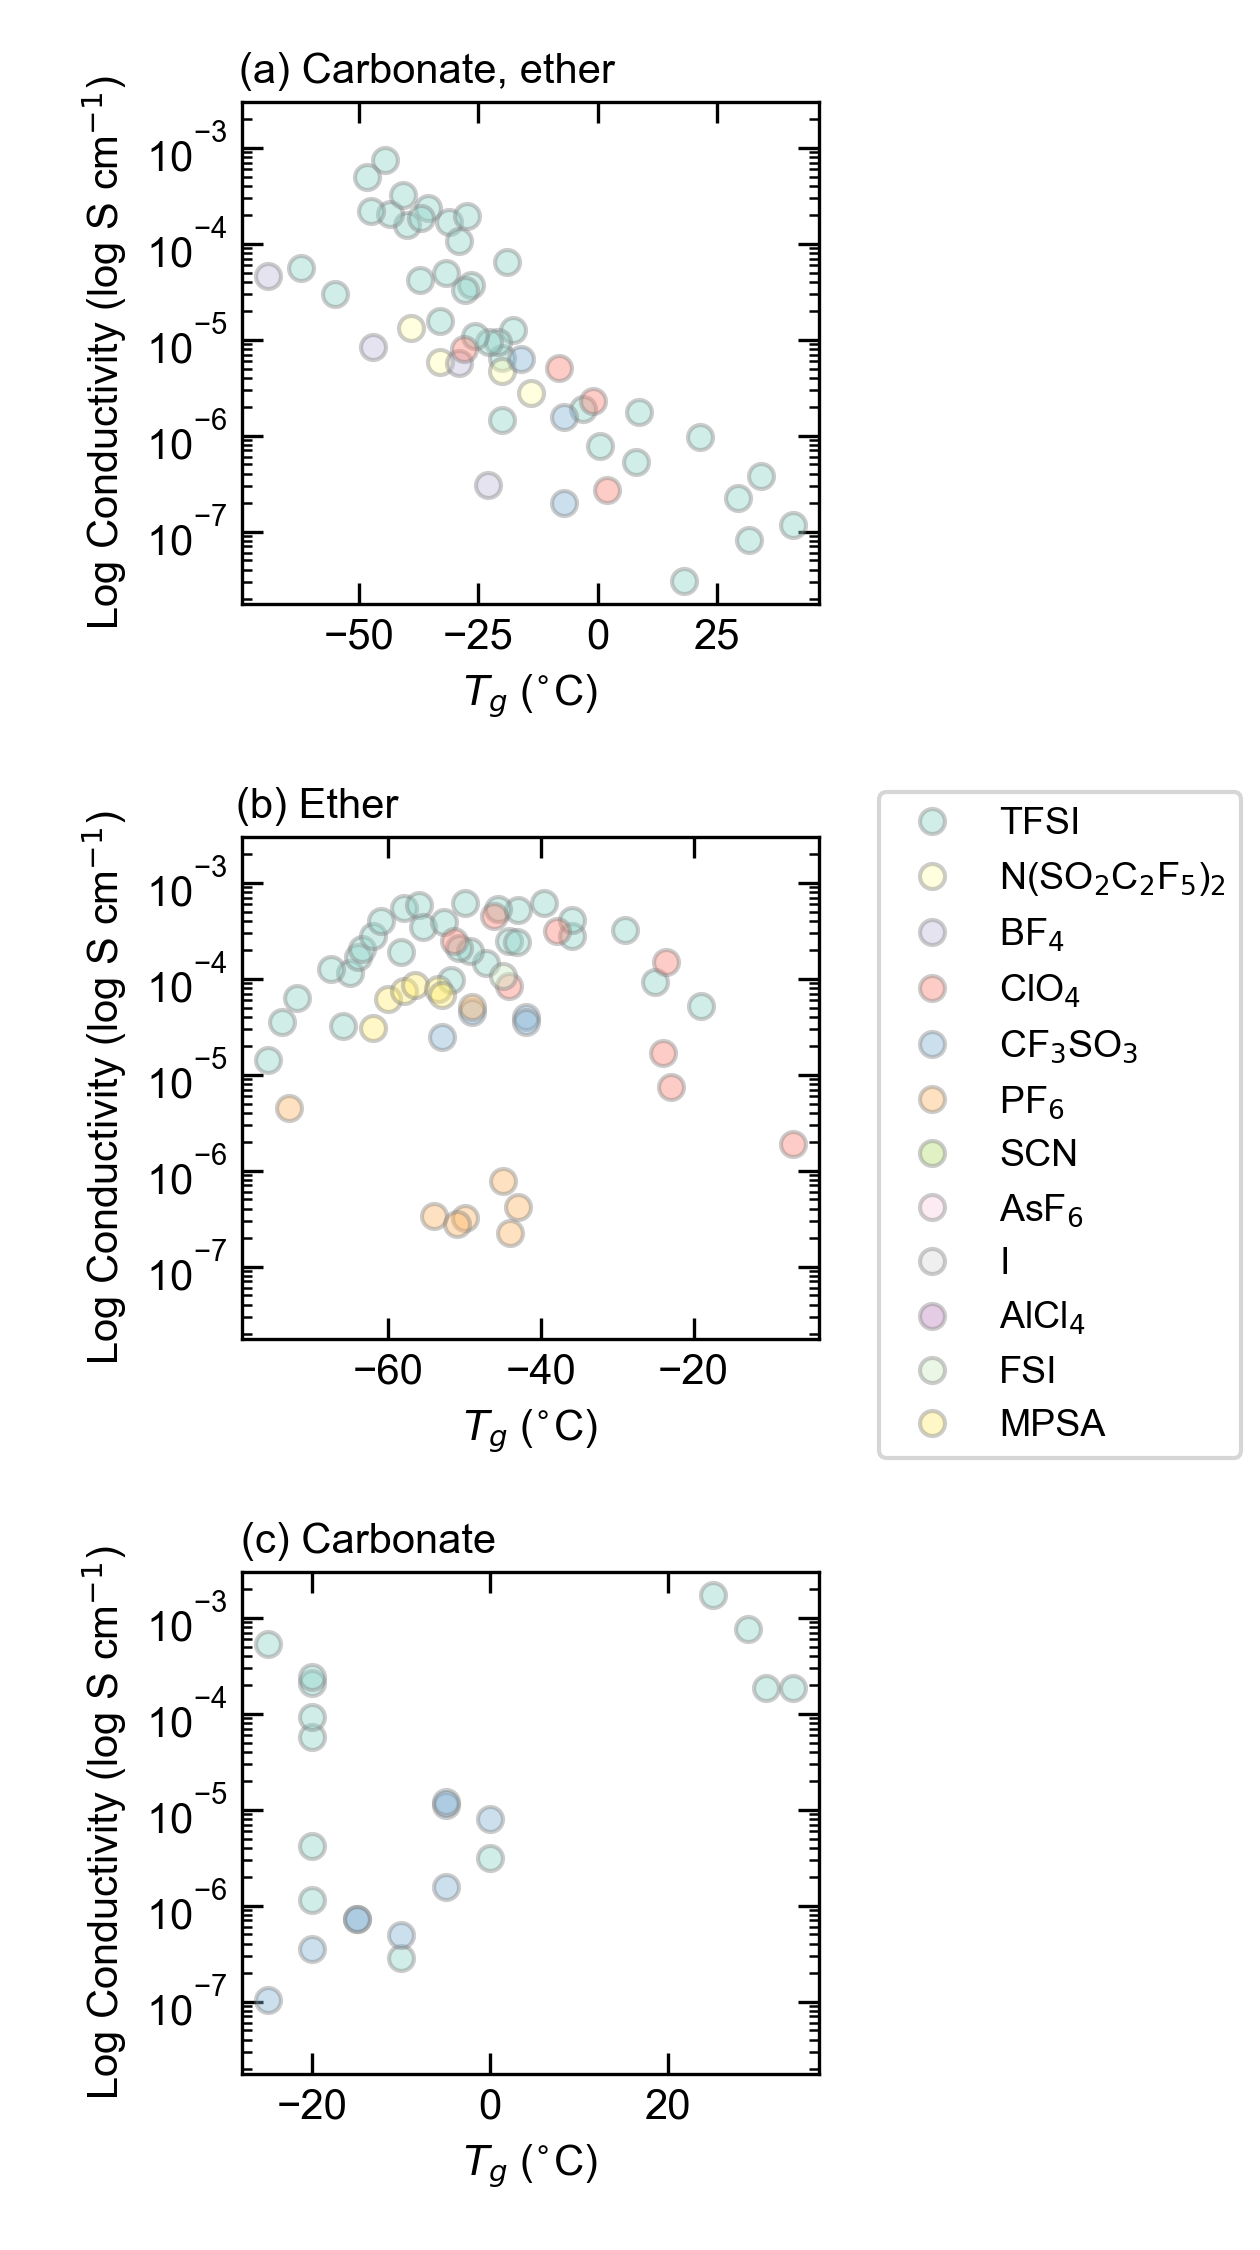

In [59]:
fig, ax = plt.subplots(nrows = 3, ncols = 1, sharey = 'col', figsize=(4.2,7.5)) #
anion_type = pd.unique(data['Anion'])
mpl.rcParams['font.size'] = 10

data_carb_eth = data[data['Polymer family']== 'carbonate, ether']
data_carb = data[data['Polymer family']== 'carbonate']
data_eth = data[data['Polymer family']== 'ether']

for anion in anion_type:
    data1 = data_carb_eth[data_carb_eth['Anion']== anion]
    data2 = data_carb[data_carb['Anion']== anion]
    data3 = data_eth[data_eth['Anion']== anion]
    ax[0].plot(data1['Tg'],data1['Conductivity at 60C'],'o', ms=6, label=anion, alpha = 0.4,mec='grey',)
    ax[1].plot(data3['Tg'],data3['Conductivity at 60C'],'o', ms=6, label=anion, alpha = 0.4,mec='grey',)
    ax[2].plot(data2['Tg'],data2['Conductivity at 60C'],'o', ms=6, label=anion, alpha = 0.4,mec='grey',)
     
ax[0].set_xlabel('$T_g$ ($^{\circ}$C)',fontsize=10)
ax[0].set_ylabel('Log Conductivity (log S cm$^{-1}$)',fontsize=10)
ax[0].set_yscale('log')
ax[0].tick_params(which = 'major',direction='in', length=5, bottom=True, top=True, left=True, right=True)
ax[0].tick_params(axis = 'y',which = 'minor',direction='in', length=2.5,left=True, right=True)
ax[0].set(adjustable='box')
ax[0].text(-75,0.01,'(a) Carbonate, ether',verticalalignment='top', horizontalalignment='left',)

ax[1].set_xlabel('$T_g$ ($^{\circ}$C)',fontsize=10)
ax[1].set_yscale('log')
ax[1].set_ylabel('Log Conductivity (log S cm$^{-1}$)',fontsize=10)
ax[1].tick_params(which = 'major',direction='in', length=5, bottom=True, top=True, left=True, right=True)
ax[1].tick_params(axis = 'y',which = 'minor',direction='in', length=2.5,left=True, right=True)
ax[1].text(-80,0.01,'(b) Ether',verticalalignment='top', horizontalalignment='left',)


ax[2].set_xlabel('$T_g$ ($^{\circ}$C)',fontsize=10)
ax[2].set_yscale('log')
ax[2].set_ylabel('Log Conductivity (log S cm$^{-1}$)',fontsize=10)
ax[2].tick_params(which = 'major',direction='in', length=5, bottom=True, top=True, left=True, right=True)
ax[2].tick_params(which = 'minor',direction='in', length=2.5, bottom=False, top=False,left=True, right=True)
ax[2].text(-28,0.01,'(c) Carbonate',verticalalignment='top', horizontalalignment='left',)


fig.legend(labels = ['TFSI','N(SO$_2$C$_2$F$_5$)$_2$','BF$_4$','ClO$_4$','CF$_3$SO$_3$','PF$_6$','SCN','AsF$_6$','I',
                     'AlCl$_4$','FSI','MPSA'], loc=7, fontsize=9)
fig.tight_layout()
fig.subplots_adjust(right=0.65)


<IPython.core.display.Javascript object>


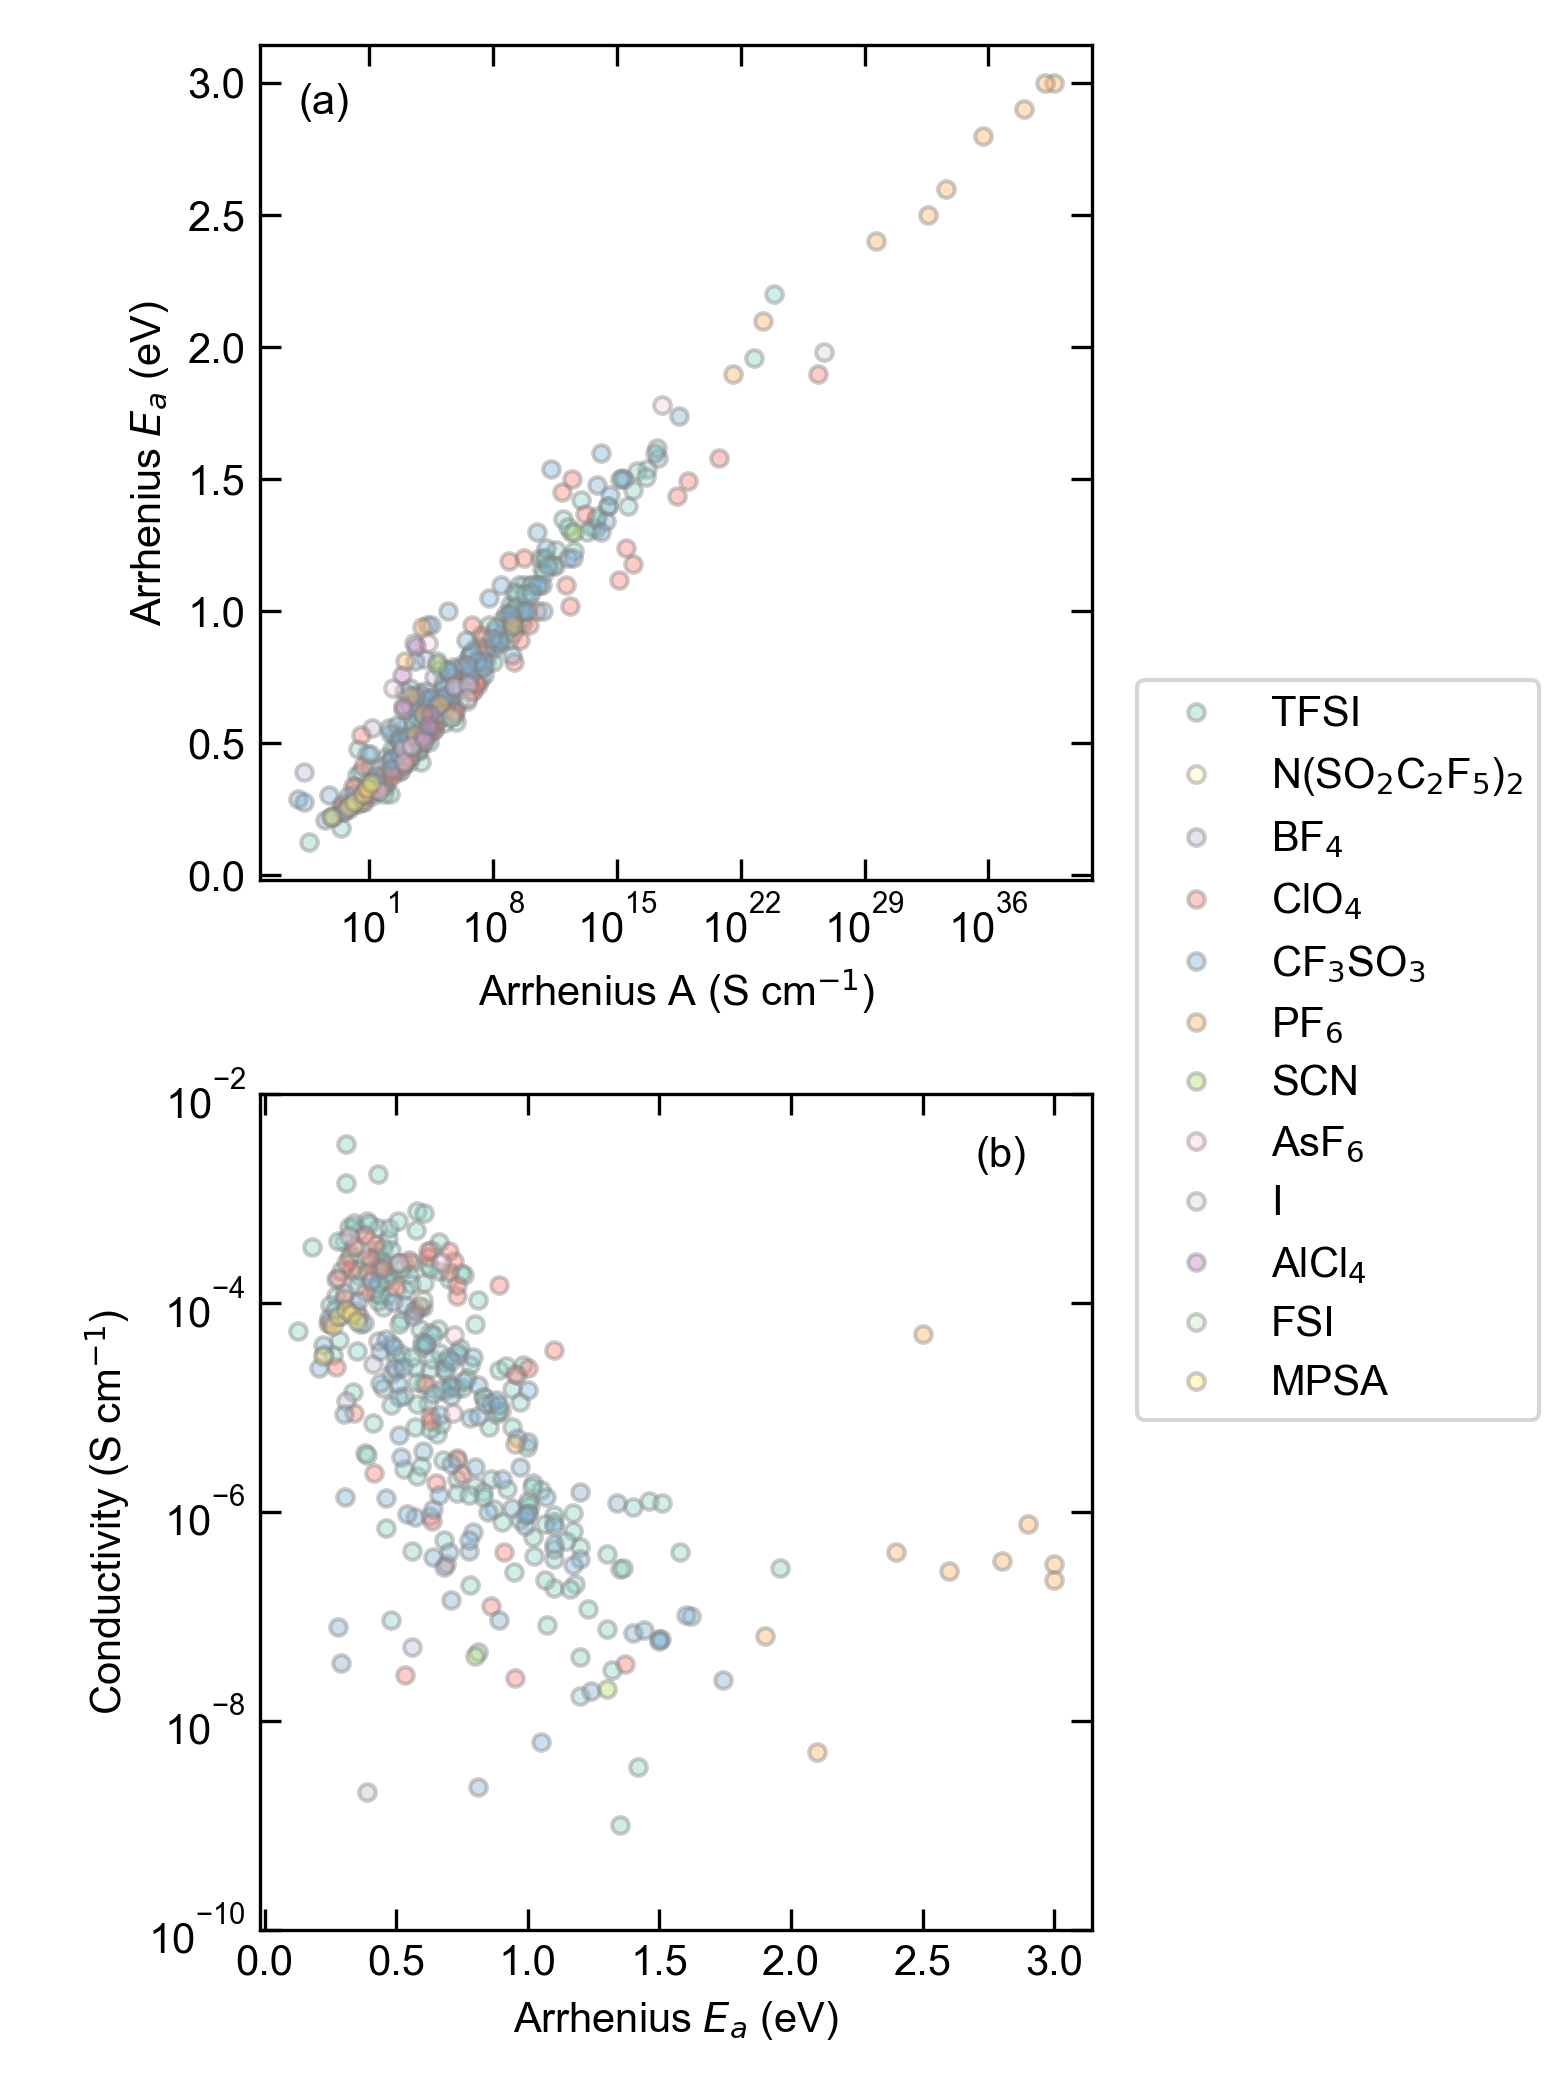

In [60]:
# change font size for next figure
mpl.rcParams['font.size'] = 10

fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize=(5.2,7))
anion_type = pd.unique(data['Anion'])

for anion in anion_type:
    data1 = data[data['Anion']== anion]
    ax[0].plot(data1['Arrhenius prefactor (S/cm)'],data1['Arrhenius Ea (eV)'],'o', ms=4, label=anion, alpha = 0.4,mec='grey',)
    ax[1].plot(data1['Arrhenius Ea (eV)'],data1['Conductivity at 60C'],'o', ms=4, label=anion, alpha = 0.4,mec='grey',)
ax[1].set_xlabel('Arrhenius $E_a$ (eV)',fontsize=10)
ax[1].set_ylabel('Conductivity (S cm$^{-1}$)',fontsize=10)
ax[1].set_yscale('log')
ax[1].set_ylim([1e-10,1e-2])
ax[1].tick_params(which = 'major',direction='in', length=5, bottom=True, top=True, left=True, right=True)
ax[1].tick_params(axis = 'y',which = 'minor',direction='in', length=4,left=True, right=True)
ax[1].set(adjustable='box')
ax[1].text(2.7,0.004,'(b)',verticalalignment='top', horizontalalignment='left',)

ax[0].set_xlabel('Arrhenius A (S cm$^{-1}$)',fontsize=10)
ax[0].set_ylabel('Arrhenius $E_a$ (eV)',fontsize=10)
ax[0].set_xscale('log')
ax[0].tick_params(which = 'major',direction='in', length=5, bottom=True, top=True, left=True, right=True)
ax[0].tick_params(which = 'minor',direction='in', length=3, bottom=False, top=False,left=True, right=True)
ax[0].text(.001,3,'(a)',verticalalignment='top', horizontalalignment='left',)

fig.legend(labels = ['TFSI','N(SO$_2$C$_2$F$_5$)$_2$','BF$_4$','ClO$_4$','CF$_3$SO$_3$','PF$_6$','SCN','AsF$_6$','I',
                     'AlCl$_4$','FSI','MPSA'], loc=7)
fig.tight_layout()
fig.subplots_adjust(right=.7)

<IPython.core.display.Javascript object>


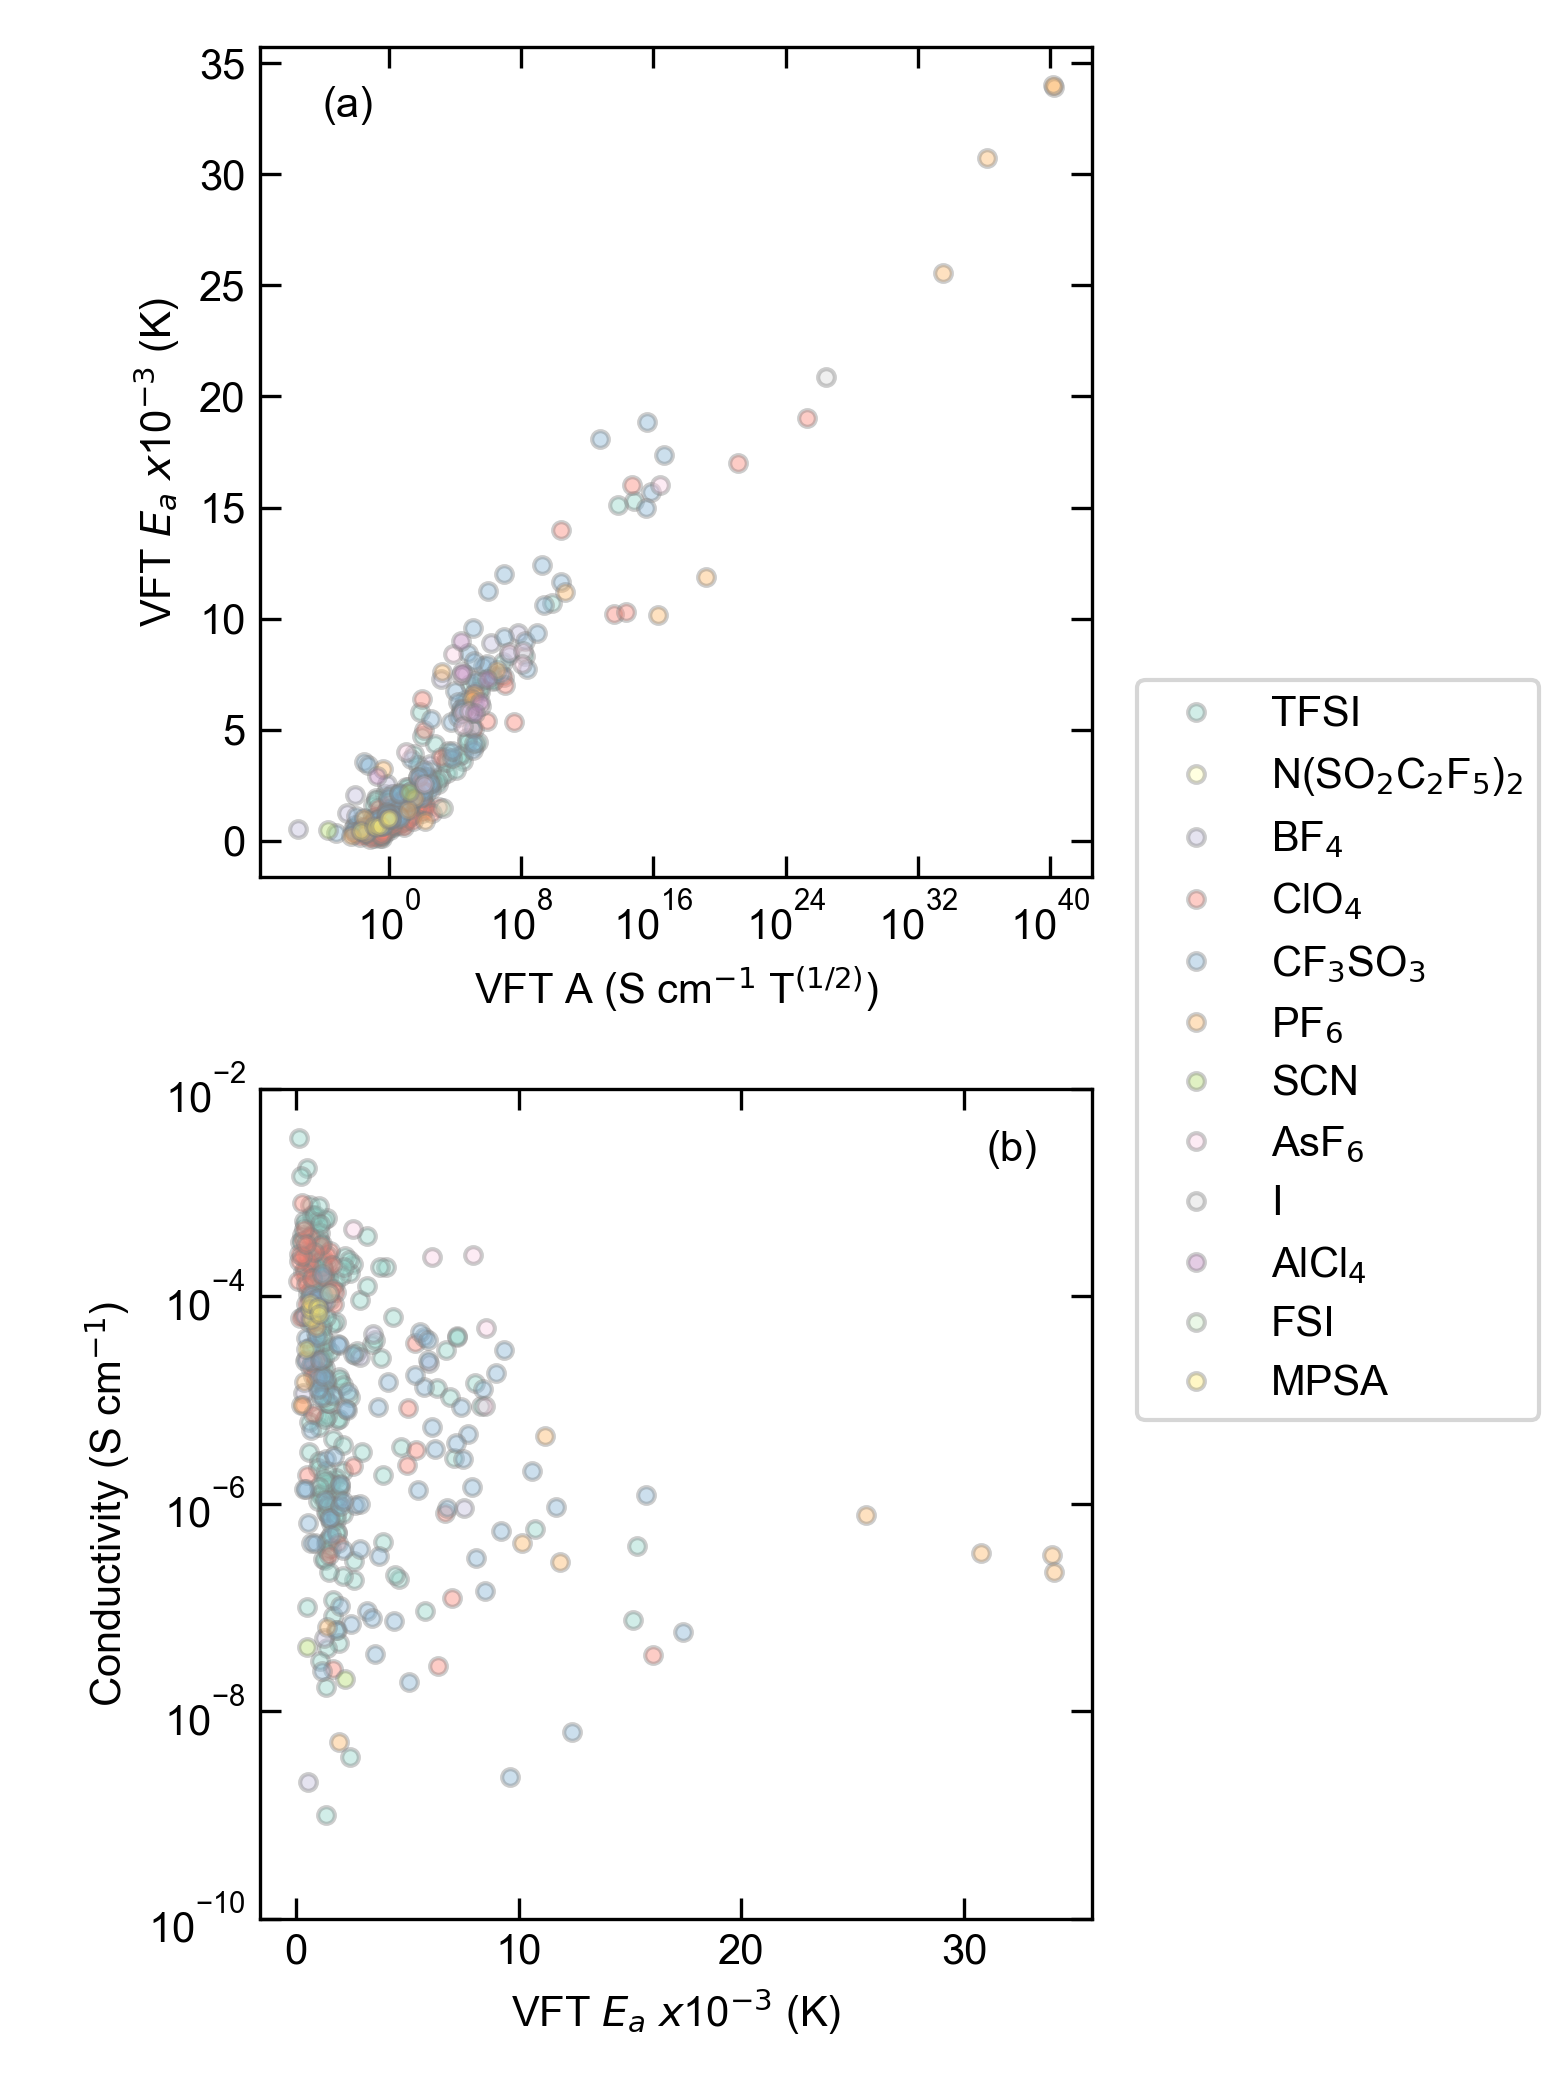

In [61]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize=(5.2,7))
anion_type = pd.unique(data['Anion'])

for anion in anion_type:
    data1 = data[data['Anion']== anion]
    ax[0].plot(data1['VFT prefactor (S/cm*T^(1/2))'],data1['VFT activation energy (K)']/1000,'o', ms=4, label=anion, alpha = 0.4,mec='grey',)
    ax[1].plot(data1['VFT activation energy (K)']/1000,data1['Conductivity at 60C'],'o', ms=4, label=anion, alpha = 0.4,mec='grey',)

ax[1].set_xlabel('VFT $E_a$ $x$10$^{-3}$ (K)',fontsize=10)
ax[1].set_ylabel('Conductivity (S cm$^{-1}$)',fontsize=10)
ax[1].set_yscale('log')
ax[1].set_ylim([1e-10,1e-2])
ax[1].tick_params(which = 'major',direction='in', length=5, bottom=True, top=True, left=True, right=True)
ax[1].tick_params(axis = 'y',which = 'minor',direction='in', length=4,left=True, right=True)
ax[1].set(adjustable='box')
ax[1].text(31,0.004,'(b)',verticalalignment='top', horizontalalignment='left',)

ax[0].set_xlabel('VFT A (S cm$^{-1}$ T$^{(1/2)}$)',fontsize=10)
ax[0].set_ylabel('VFT $E_a$ $x$10$^{-3}$ (K)',fontsize=10)
ax[0].set_xscale('log')
ax[0].tick_params(which = 'major',direction='in', length=5, bottom=True, top=True, left=True, right=True)
ax[0].tick_params(which = 'minor',direction='in', length=3, bottom=False, top=False,left=True, right=True)
ax[0].text(.0001,34,'(a)',verticalalignment='top', horizontalalignment='left',)

fig.legend(labels = ['TFSI','N(SO$_2$C$_2$F$_5$)$_2$','BF$_4$','ClO$_4$','CF$_3$SO$_3$','PF$_6$','SCN','AsF$_6$','I',
                     'AlCl$_4$','FSI','MPSA'], loc=7)
fig.tight_layout()
fig.subplots_adjust(right=.7)

## Further data cleaning for statistical learning techniques

### Importing .CSV that's cleaned for statistical regression

Now we load the smaller dataset with all the dropped columns and one-hot encoding

In [62]:
# Import data from master excel file
file_name = 'Cleaned_Final_Data-forML_6_2_2020.csv'
file_path = r'C:\Users\nicol\Box Sync\Personal\Research\DataMining_PolymerElectrolyte_Review\DataSpreadsheets\_' 
file = file_path + file_name
data_ML = pd.read_csv(file)
data_ML.head()

Polymer family                 Polymer  Comonomer percentage  \
0  carbonate, ether  polyethylene carbonate                  95.2   
1  carbonate, ether  polyethylene carbonate                  95.2   
2  carbonate, ether  polyethylene carbonate                  95.2   
3  carbonate, ether  polyethylene carbonate                  95.2   
4  carbonate, ether  polyethylene carbonate                  95.2   

         Anion  crystalline?  drying temp  drying time (h)  drying vacuum  \
0         TFSI             0           60             24.0              2   
1         TFSI             0           60             24.0              2   
2         TFSI             0           60             24.0              2   
3         TFSI             0           60             24.0              2   
4  N(SO2C2F5)2             0           60             24.0              2   

   Comonomer1 apol  Comonomer1 bpol  ...  anion ETA_dPsi_B  anion Kier1  \
0        11.416758        10.359242  ...               0.0         15.0   
1        11.416758        10.359242  ...               0.0         15.0   
2        11.416758        10.359242  ...               0.0         15.0   
3        11.416758        10.359242  ...               0.0         15.0   
4        11.416758        10.359242  ...               0.0         21.0   

   anion Kier2  solvent BP  approxTg  approxMW(kDa)  logCond60  \
0     3.785600        82.0      -3.0           37.0      -5.72   
1     3.785600        82.0     -20.0           37.0      -5.19   
2     3.785600        82.0     -33.0           37.0      -4.81   
3     3.785600        82.0     -62.0           37.0      -4.25   
4     5.273923        82.0     -14.0           37.0      -5.56   

   log Li:functional group  chain architecture_branched  \
0                -1.125997                            0   
1                -0.700029                            0   
2                -0.347846                            0   
3                 0.078123                            0   
4                -1.255939                            0   

   chain architecture_linear  
0                          1  
1                          1  
2                          1  
3                          1  
4                          1  

[5 rows x 237 columns]

In [63]:
print('Number of unique polymers: ', len(pd.unique(data_ML['Polymer'])))

Number of unique polymers:  50


### Data visualizations

Want to do some visualization before starting ML

#### Understanding groupings/prevalence of different classes

e.g. counts of polymer families, anion identities, etc...

In [65]:
polymer_families = data_ML['Polymer family'].value_counts()
print('Unique polymer families:')
print(polymer_families)

Unique polymer families:
ether                      62
carbonate, ether           50
ester                      32
carbonate                  28
amide, imidazole           21
amine                      20
ester, ether               18
phenyl                      8
nitrile                     7
ether, amide, imidazole     5
ester, carbonate            4
carbonyl                    4
alcohol, acrylate           4
amide, ether                3
imidazole                   2
phenyl, amide, ester        1
ether, acrylate             1
acrylonitrile, acrylate     1
Name: Polymer family, dtype: int64


In [66]:
# set colors
from matplotlib import cm
colors = [cm.Set3(i) for i in range(12)]

<IPython.core.display.Javascript object>


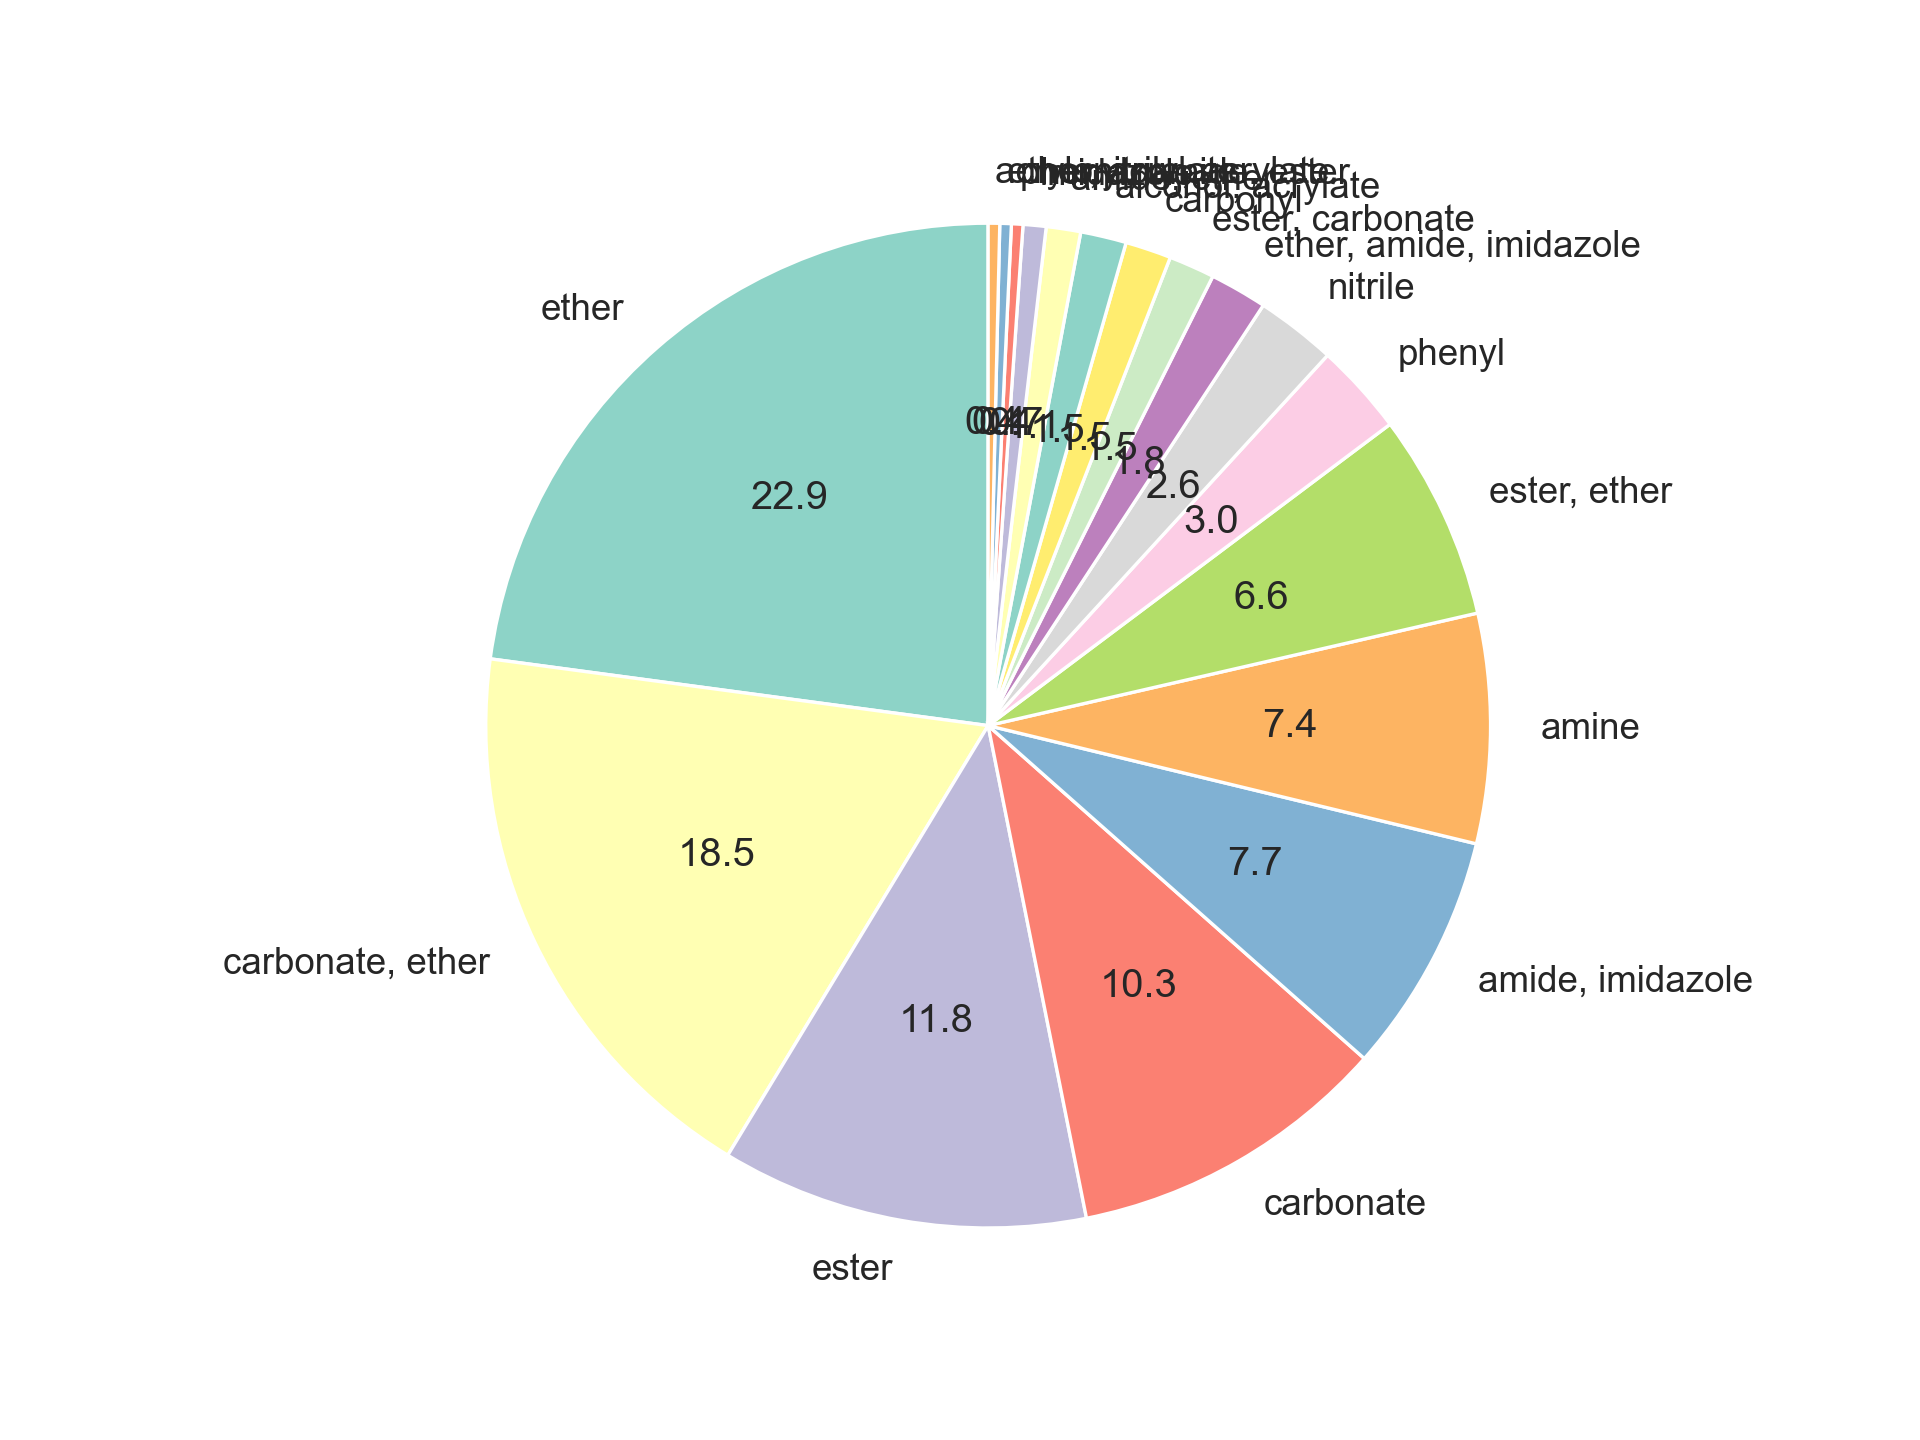

In [67]:
fig1, ax1 = plt.subplots()
ax1.pie(polymer_families.values, labels=polymer_families.keys(), autopct='%.1f', startangle=90, colors = colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Split into functional groups and group by similar functional group

In [68]:
family = []
family_counts = []
for fam,counts in polymer_families.items():
    fam = fam.replace(",","")
    family+=fam.split(" ")
    for i in range(len(fam.split(" "))):
        family_counts.append(counts)
        
polym_fam = pd.DataFrame(columns = ['Polymer_fams','Entries'])
polym_fam['Polymer_fams'] = family
polym_fam['Entries'] = family_counts

In [69]:
polym_fam

Polymer_fams  Entries
0           ether       62
1       carbonate       50
2           ether       50
3           ester       32
4       carbonate       28
5           amide       21
6       imidazole       21
7           amine       20
8           ester       18
9           ether       18
10         phenyl        8
11        nitrile        7
12          ether        5
13          amide        5
14      imidazole        5
15          ester        4
16      carbonate        4
17       carbonyl        4
18        alcohol        4
19       acrylate        4
20          amide        3
21          ether        3
22      imidazole        2
23         phenyl        1
24          amide        1
25          ester        1
26          ether        1
27       acrylate        1
28  acrylonitrile        1
29       acrylate        1

In [70]:
polym_condensed = polym_fam.groupby(by='Polymer_fams',axis=0,as_index=False).sum()

In [71]:
polym_condensed=polym_condensed.sort_values(by = ['Entries'],ascending=False)

In [72]:
polym_condensed

Polymer_fams  Entries
8           ether      139
5       carbonate       82
7           ester       55
3           amide       30
9       imidazole       28
4           amine       20
11         phenyl        9
10        nitrile        7
0        acrylate        6
2         alcohol        4
6        carbonyl        4
1   acrylonitrile        1

Fix functional group naming again, just as above

In [73]:
polym_nitrile = pd.DataFrame({'Polymer_fams':['nitrile'],'Entries':[sum([polym_condensed['Entries'][10],polym_condensed['Entries'][1]])]})
polym_condensed = polym_condensed.append(polym_nitrile, ignore_index=True)


In [74]:
polym_condensed

Polymer_fams  Entries
0           ether      139
1       carbonate       82
2           ester       55
3           amide       30
4       imidazole       28
5           amine       20
6          phenyl        9
7         nitrile        7
8        acrylate        6
9         alcohol        4
10       carbonyl        4
11  acrylonitrile        1
12        nitrile        8

In [75]:
polym_condensed.drop([7,11],axis=0,inplace=True)
polym_condensed

Polymer_fams  Entries
0         ether      139
1     carbonate       82
2         ester       55
3         amide       30
4     imidazole       28
5         amine       20
6        phenyl        9
8      acrylate        6
9       alcohol        4
10     carbonyl        4
12      nitrile        8

In [76]:
polym_condensed=polym_condensed.sort_values(by = ['Entries'],ascending=False)
polym_condensed

Polymer_fams  Entries
0         ether      139
1     carbonate       82
2         ester       55
3         amide       30
4     imidazole       28
5         amine       20
6        phenyl        9
12      nitrile        8
8      acrylate        6
9       alcohol        4
10     carbonyl        4

#### Add smallest number of functional groups to 'other' category

In [78]:
print('Percentage of acrylates: ',(polym_condensed['Entries'][8]/sum(polym_condensed['Entries'])*100))
print('Percentage of alcohols: ',(polym_condensed['Entries'][9]/sum(polym_condensed['Entries'])*100))
print('Percentage of carbonyl: ',(polym_condensed['Entries'][10]/sum(polym_condensed['Entries'])*100))

Percentage of acrylates:  1.5584415584415585
Percentage of alcohols:  1.0389610389610389
Percentage of carbonyl:  1.0389610389610389


In [79]:
polym_other = pd.DataFrame({'Polymer_fams':['Other'],'Entries':[sum(polym_condensed['Entries'][-3:])]})
polym_other = polym_condensed.append(polym_other, ignore_index=True)
polym_other.drop([8,9,10],axis=0,inplace=True)

In [80]:
polym_other

Polymer_fams  Entries
0         ether      139
1     carbonate       82
2         ester       55
3         amide       30
4     imidazole       28
5         amine       20
6        phenyl        9
7       nitrile        8
11        Other       14

<IPython.core.display.Javascript object>


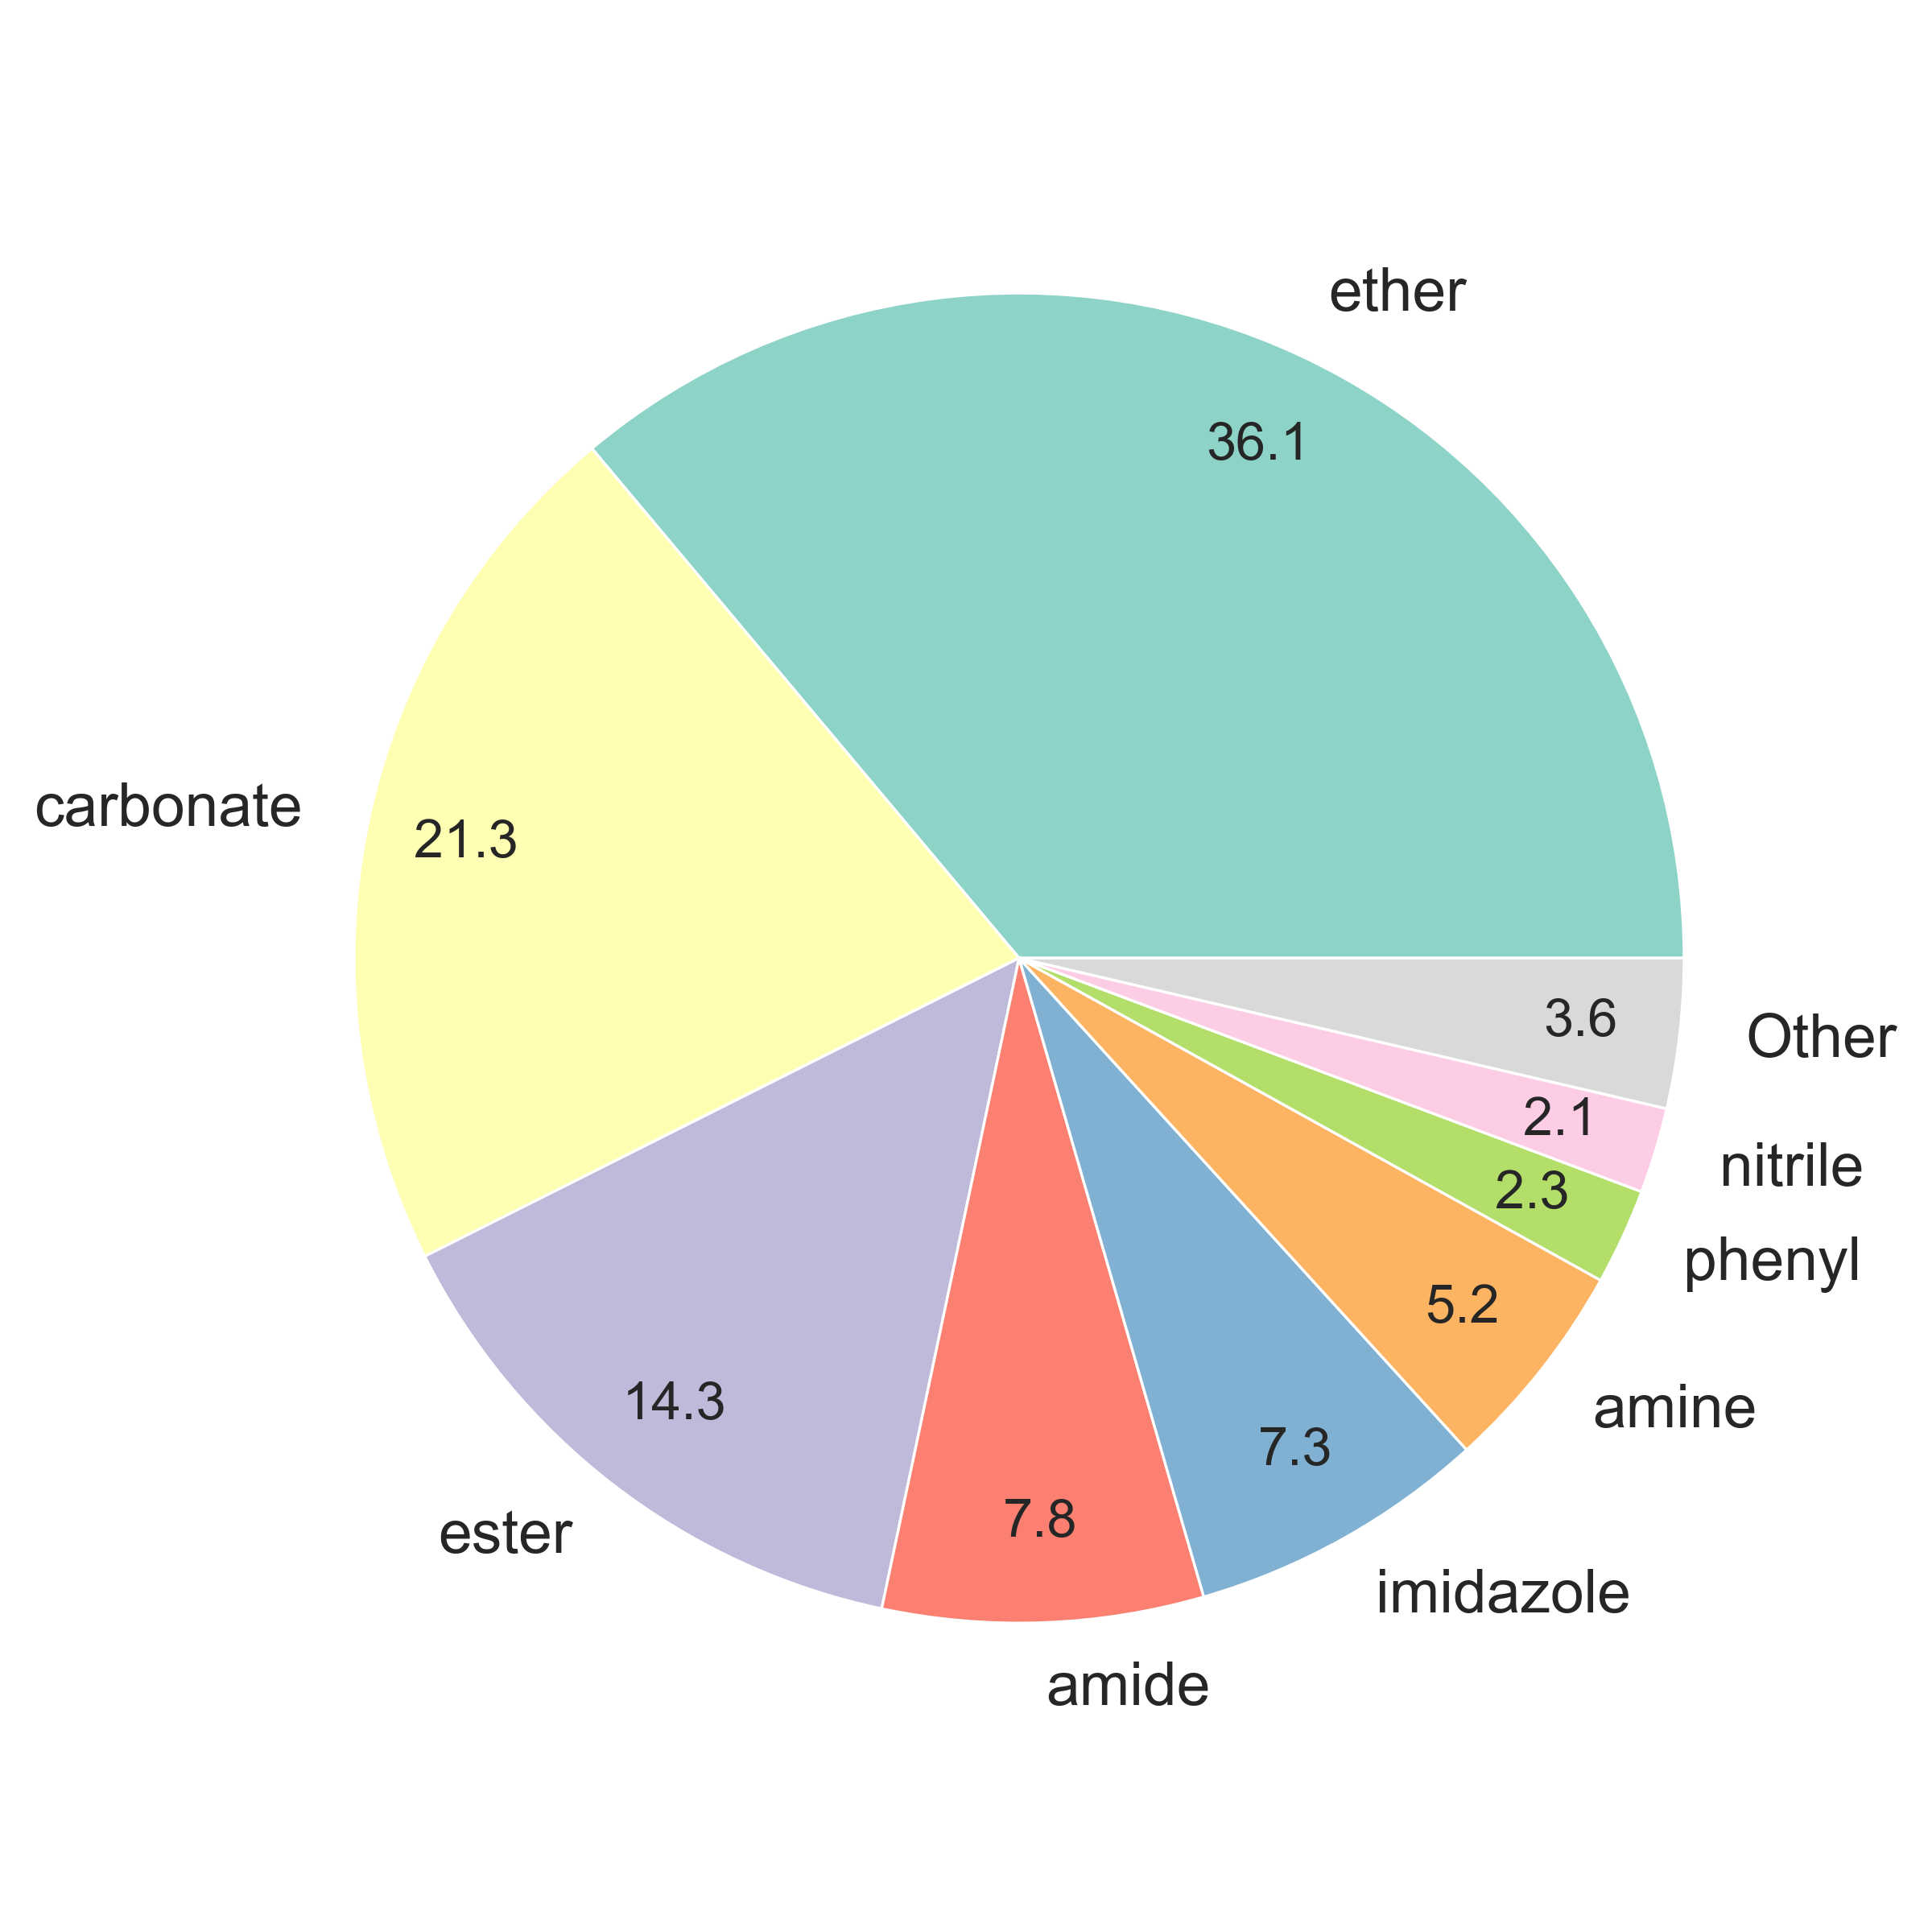

In [81]:
fig1, ax1 = plt.subplots(figsize=(8,8))
wedges, texts, autotexts =ax1.pie(polym_other['Entries'], labels=polym_other['Polymer_fams'], autopct='%.1f',pctdistance = 0.85, startangle=0, colors = colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.setp(autotexts,size=16)
plt.setp(texts,size=18)
plt.tight_layout()
plt.show()

Plot pie chart of anions, grouping less frequent anions for easier visualization

In [83]:
anions = data_ML['Anion'].value_counts()
anions

TFSI           173
CF3SO3          39
ClO4            35
PF6              7
MPSA             6
N(SO2C2F5)2      4
BF4              4
SCN              2
FSI              1
Name: Anion, dtype: int64

In [84]:
print('Percentage of N(SO2C2F5)2: ',(anions['N(SO2C2F5)2']/sum(anions)*100))
print('Percentage of BF4: ',(anions['BF4']/sum(anions)*100))
print('Percentage of SCN: ',(anions['SCN']/sum(anions)*100))
print('Percentage of FSI: ',(anions['FSI']/sum(anions)*100))

Percentage of N(SO2C2F5)2:  1.4760147601476015
Percentage of BF4:  1.4760147601476015
Percentage of SCN:  0.7380073800738007
Percentage of FSI:  0.36900369003690037


In [85]:
anions_other_counts = anions['N(SO2C2F5)2'] + anions['BF4'] + anions['SCN'] + anions['FSI']
anions_other_counts

11

In [86]:
anions.keys()

Index(['TFSI', 'CF3SO3', 'ClO4', 'PF6', 'MPSA', 'N(SO2C2F5)2', 'BF4', 'SCN',
       'FSI'],
      dtype='object')

In [87]:
anions_other = pd.Series(data=[anions['TFSI'],anions['CF3SO3'], anions['ClO4'], anions['PF6'], 
                anions['MPSA'],anions_other_counts], index = ['TFSI$^-$','CF$_3$SO$_3$$^-$','ClO$_4$$^-$','PF$_6$$^-$','MPSA$^-$','Other'])

In [88]:
anions_other

TFSI$^-$            173
CF$_3$SO$_3$$^-$     39
ClO$_4$$^-$          35
PF$_6$$^-$            7
MPSA$^-$              6
Other                11
dtype: int64

<IPython.core.display.Javascript object>


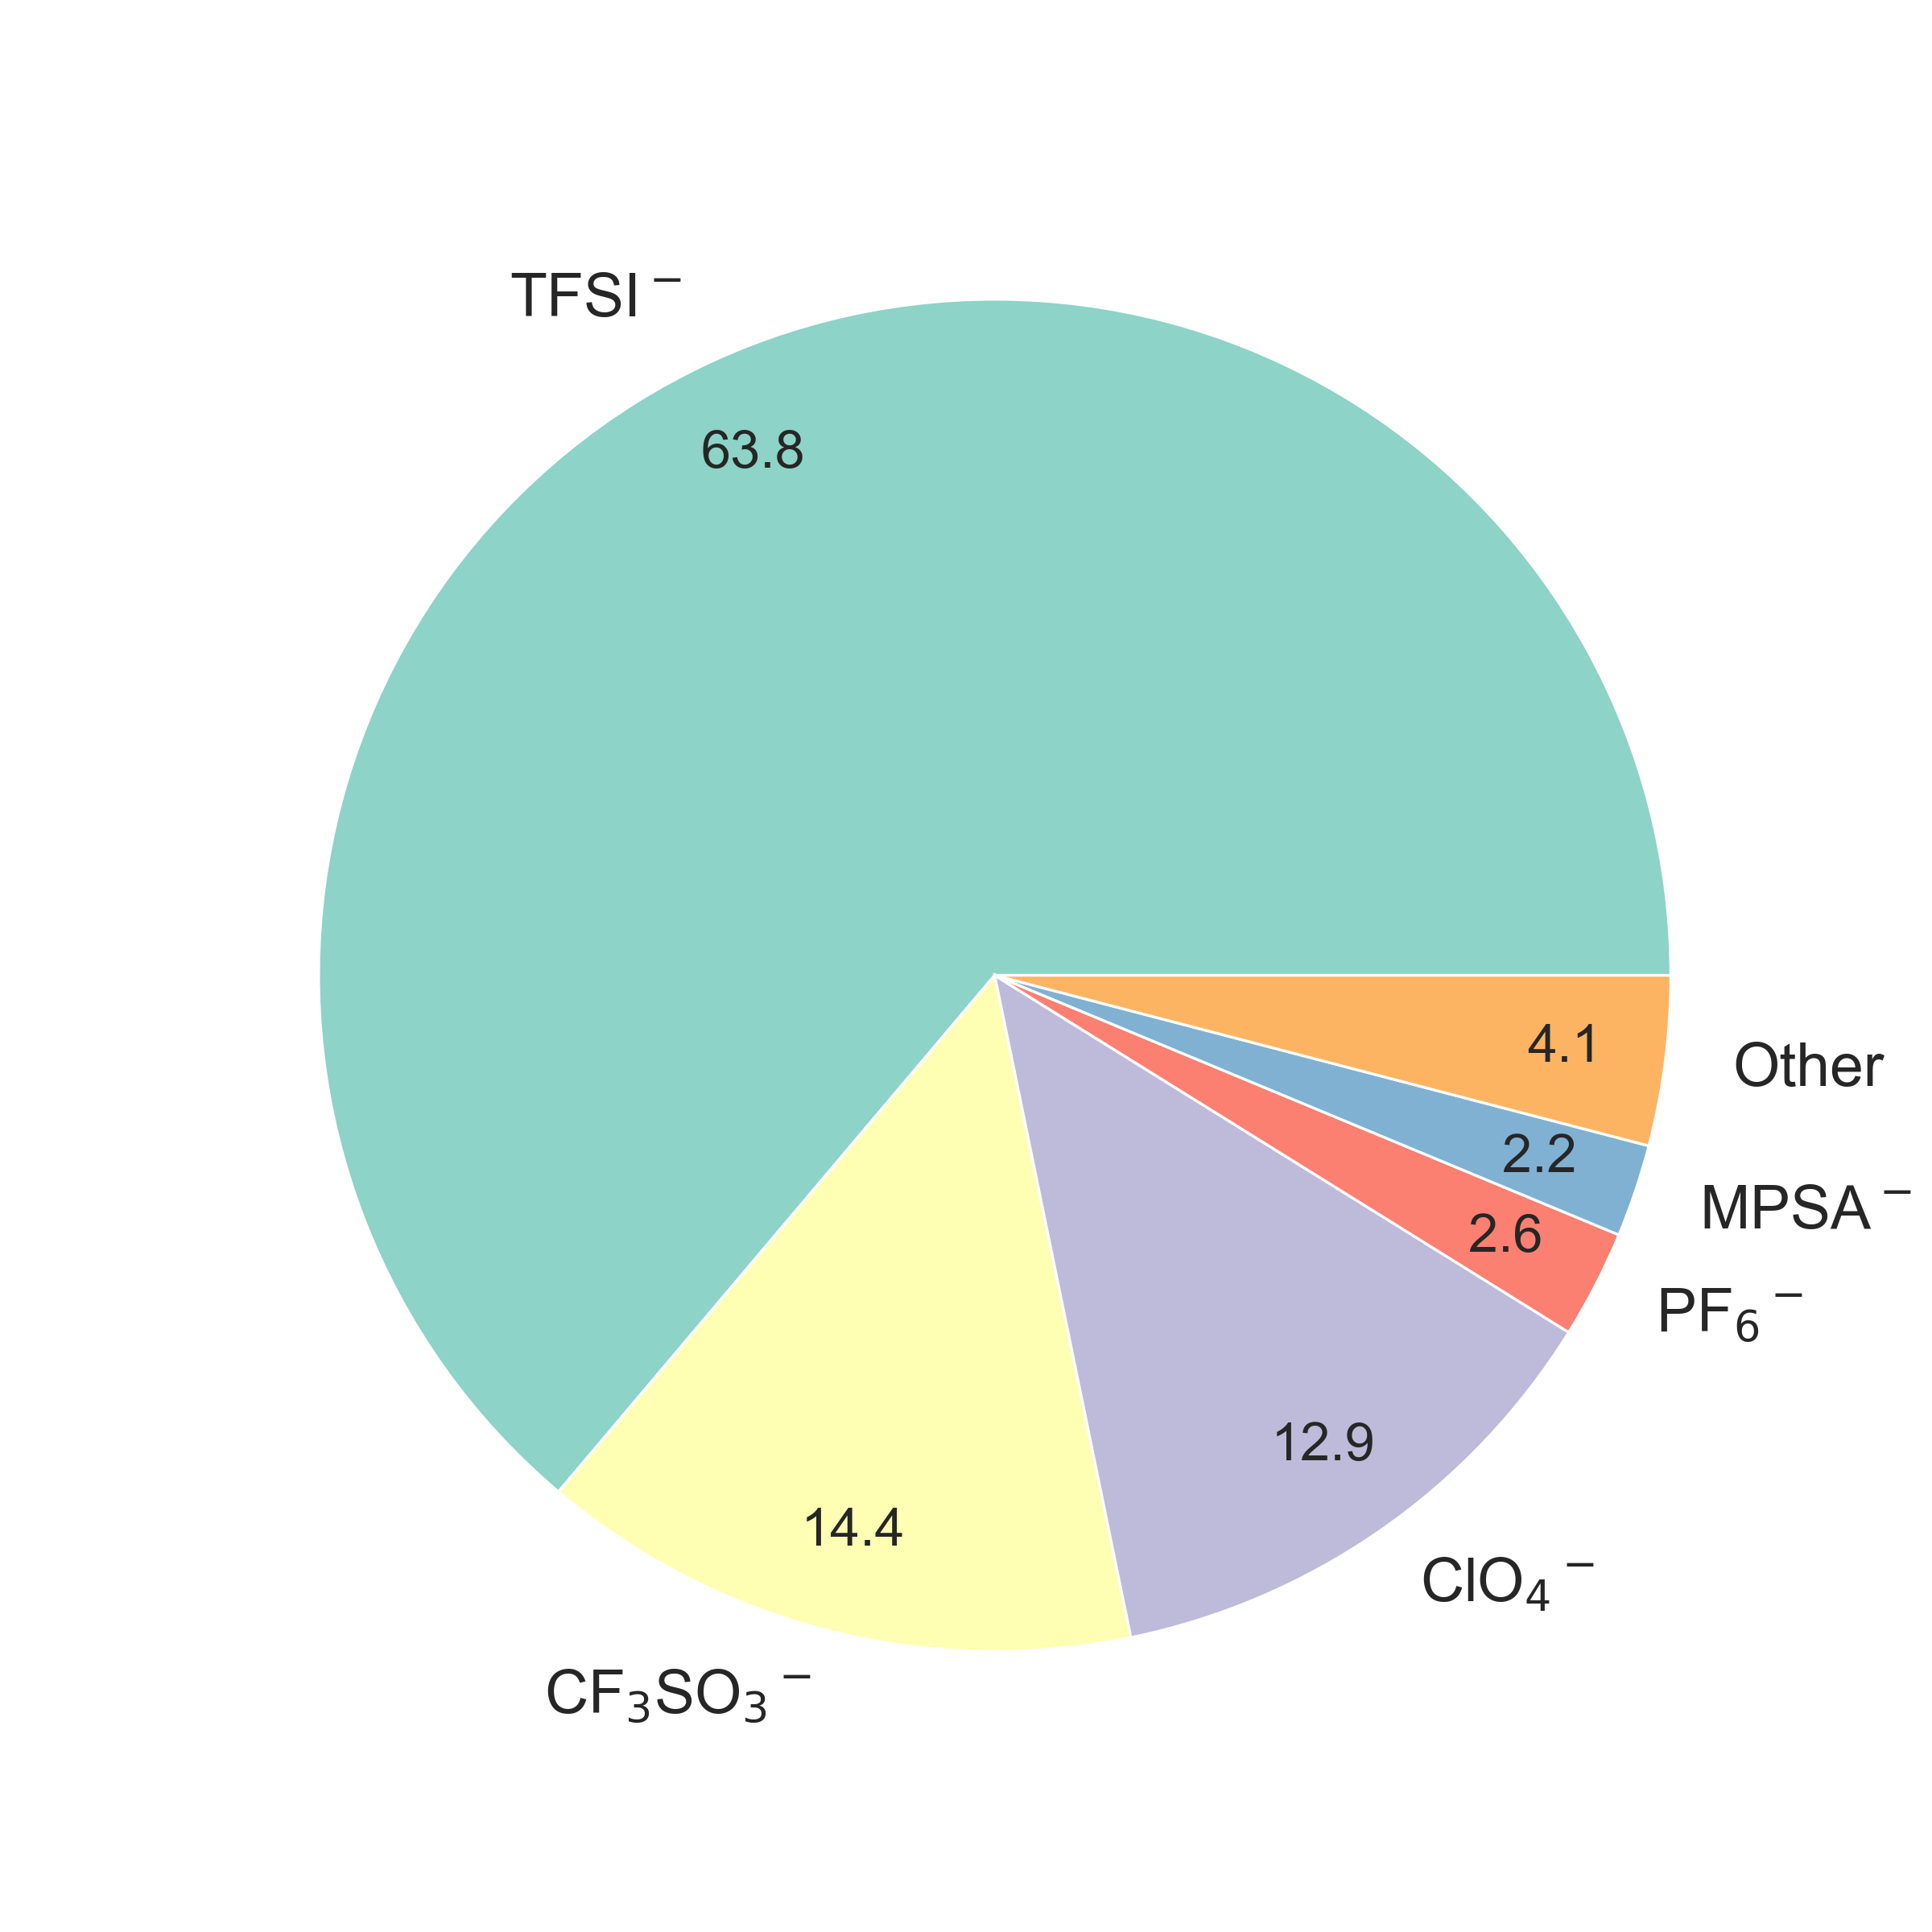

In [89]:
fig3, ax3 = plt.subplots(figsize=(8,8))
wedges, texts, autotexts = ax3.pie(anions_other.values, labels=anions_other.keys(), autopct='%.1f', pctdistance = 0.85, startangle=0,colors = colors)
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.setp(autotexts,size=16)
plt.setp(texts,size=18)
plt.show()